/tmp/ipython-input-2122434551.py:38: RuntimeWarning: divide by zero encountered in log
  lse = np.log(np.sum(np.exp(-beta * np.array(distances))))


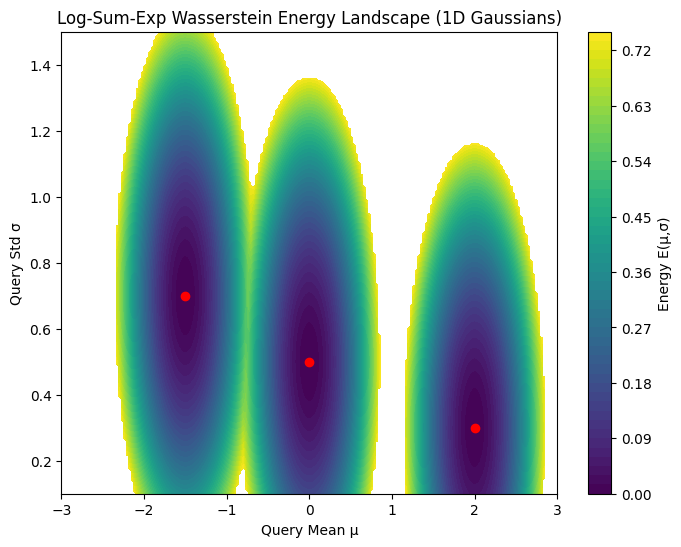

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
beta = 1000   # sharpness of log-sum-exp
lambda_ = 1/beta

# Stored distributions: 1D Gaussians (mean, std)
stored_gaussians = [
    (0.0, 0.5),
    (2.0, 0.3),
    (-1.5, 0.7)
]

# Grid of query Gaussians
mu_grid = np.linspace(-3, 3, 200)
sigma_grid = np.linspace(0.1, 1.5, 200)
MU, SIGMA = np.meshgrid(mu_grid, sigma_grid)

# -----------------------------
# Wasserstein-2 distance for 1D Gaussians
# W2^2 = (mu1 - mu2)^2 + (sigma1 - sigma2)^2
# -----------------------------
def W2_sq(mu1, sigma1, mu2, sigma2):
    return (mu1 - mu2)**2 + (sigma1 - sigma2)**2

# -----------------------------
# Compute log-sum-exp energy
# -----------------------------
E = np.zeros_like(MU)
for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        mu_q = MU[i, j]
        sigma_q = SIGMA[i, j]
        distances = [W2_sq(mu_q, sigma_q, mu_i, sigma_i) for mu_i, sigma_i in stored_gaussians]
        lse = np.log(np.sum(np.exp(-beta * np.array(distances))))
        E[i, j] = -lambda_ * lse

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(8,6))
plt.contourf(MU, SIGMA, E, levels=50, cmap='viridis')
plt.colorbar(label='Energy E(μ,σ)')
plt.xlabel('Query Mean μ')
plt.ylabel('Query Std σ')
plt.title('Log-Sum-Exp Wasserstein Energy Landscape (1D Gaussians)')

# Mark stored distributions
for mu_i, sigma_i in stored_gaussians:
    plt.plot(mu_i, sigma_i, 'ro', markersize=6, label='Stored Gaussian')
plt.show()


/tmp/ipython-input-3347901321.py:38: RuntimeWarning: divide by zero encountered in log
  lse = np.log(np.sum(np.exp(-beta * np.array(distances))))


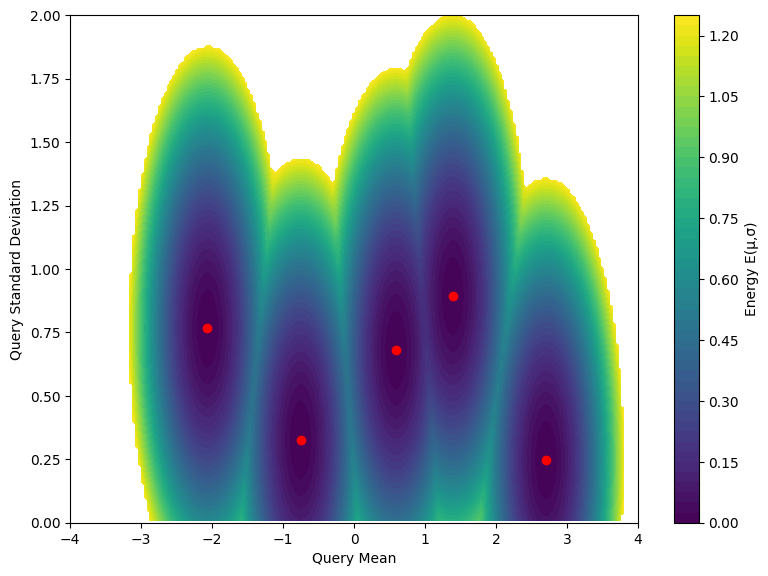

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
beta = 600         # sharpness of log-sum-exp
lambda_ = 1.0 / beta  # lambda = 1/beta

# Stored distributions: 10 random 1D Gaussians (mean in [-3,3], std in [0.2,1.0])
np.random.seed(42)
stored_gaussians = [(mu, sigma) for mu, sigma in zip(
    np.random.uniform(-3, 3, 5),
    np.random.uniform(0.2, 1.0, 5)
)]

# Grid of query Gaussians
mu_grid = np.linspace(-4, 4, 200)
sigma_grid = np.linspace(0.01, 2, 200)
MU, SIGMA = np.meshgrid(mu_grid, sigma_grid)

# -----------------------------
# Wasserstein-2 distance for 1D Gaussians
# W2^2 = (mu1 - mu2)^2 + (sigma1 - sigma2)^2
# -----------------------------
def W2_sq(mu1, sigma1, mu2, sigma2):
    return (mu1 - mu2)**2 + (sigma1 - sigma2)**2

# -----------------------------
# Compute log-sum-exp energy
# -----------------------------
E = np.zeros_like(MU)
for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        mu_q = MU[i, j]
        sigma_q = SIGMA[i, j]
        distances = [W2_sq(mu_q, sigma_q, mu_i, sigma_i) for mu_i, sigma_i in stored_gaussians]
        lse = np.log(np.sum(np.exp(-beta * np.array(distances))))
        E[i, j] = -lambda_ * lse

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(8,6))
plt.contourf(MU, SIGMA, E, levels=50, cmap='viridis')
plt.colorbar(label='Energy E(μ,σ)')
plt.xlabel('Query Mean')
plt.ylabel('Query Standard Deviation')
#plt.title('Log-Sum-Exp Wasserstein Energy Landscape (1D Gaussians)')

# Mark stored distributions
for mu_i, sigma_i in stored_gaussians:
    plt.plot(mu_i, sigma_i, 'ro', markersize=6)

plt.ylim(0, 2)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig('energy_landscape_beta = 0.1.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('energy_landscape_beta = 0.1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Sampling and retrieval of patterns with $N = 5000$, $d = 25$, $\beta = 1$. Basin of attraction radius in $W_2$ distance = $1 / \sqrt{\beta N}$**

---



WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT
Sampling 5000 Gaussians on Wasserstein sphere
  Sphere radius R = 7.2457
  Mean vectors sampled at radius R/√2 = 5.1235
  Target eigenvalue sum S = 26.2500
  Eigenvalue bounds: [1, 1.1]
  Sampled 1000/5000 patterns (rejections so far: 2566)
  Sampled 2000/5000 patterns (rejections so far: 5164)
  Sampled 3000/5000 patterns (rejections so far: 7790)
  Sampled 4000/5000 patterns (rejections so far: 10384)
  Sampled 5000/5000 patterns (rejections so far: 12946)

Verifying first 5 patterns are on the Wasserstein sphere:
  Pattern 0: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 1: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 2: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 3: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 4: W_2 dist from origin = 7.245688, mean norm = 5.123475

Retrieval Dynamics Experiment
Testing 3750 patterns out of 5000 total patterns
Perturbation radius: 0.0

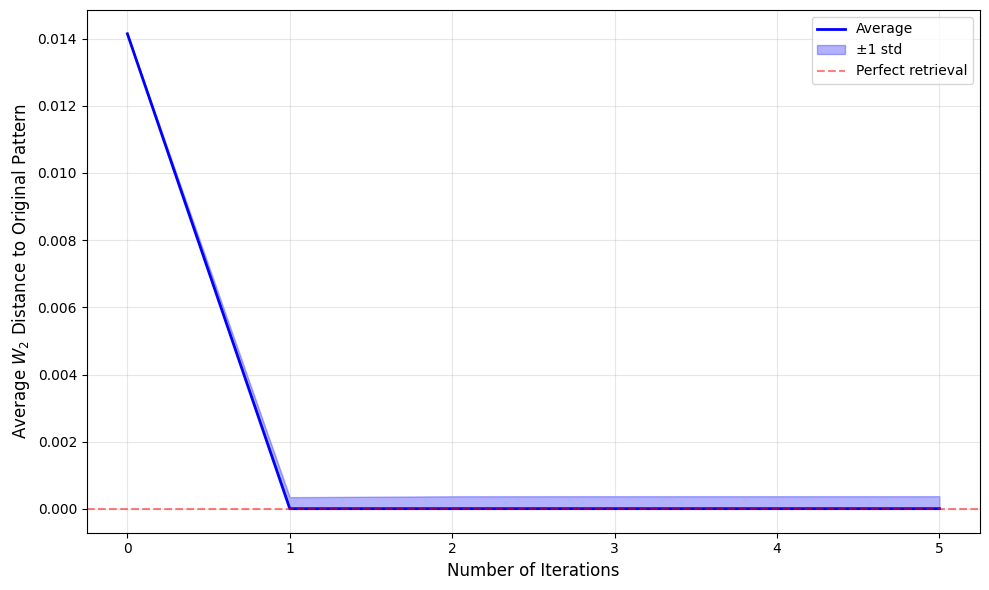

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_gaussians_on_wasserstein_sphere(N, d, lambda_min, lambda_max, seed=42):
    """
    Returns
    -------
    Sample N Gaussian distributions on a Wasserstein sphere using modified Algorithm 1 and return
    means : N x d array of mean vectors
    eigenvalues : N x d array of eigenvalue vectors
    """
    np.random.seed(seed)

    # Compute sphere radius and target sum
    R_squared = d * (lambda_max + lambda_min)
    R = np.sqrt(R_squared)
    target_sum = R_squared / 2

    # Storage for patterns
    means = np.zeros((N, d))
    eigenvalues = np.zeros((N, d))

    print(f"Sampling {N} Gaussians on Wasserstein sphere")
    print(f"  Sphere radius R = {R:.4f}")
    print(f"  Mean vectors sampled at radius R/√2 = {R/np.sqrt(2):.4f}")
    print(f"  Target eigenvalue sum S = {target_sum:.4f}")
    print(f"  Eigenvalue bounds: [{lambda_min}, {lambda_max}]")

    rejection_count = 0

    for i in range(N):
        # Rejection sampling for eigenvalues
        eigenvalues_found = False

        while not eigenvalues_found:
            # Sample first d-1 eigenvalues uniformly from [lambda_min, lambda_max]
            lambda_partial = np.random.uniform(lambda_min, lambda_max, d-1)

            # Compute the d-th eigenvalue to satisfy sum constraint
            lambda_d = target_sum - np.sum(lambda_partial)

            # Check if lambda_d is in valid range
            if lambda_min <= lambda_d <= lambda_max:
                # Combine all eigenvalues
                lambda_i = np.append(lambda_partial, lambda_d)

                # Randomly permute to avoid positional bias
                np.random.shuffle(lambda_i)

                eigenvalues[i] = lambda_i
                eigenvalues_found = True
            else:
                rejection_count += 1

        # Sample mean vector uniformly on sphere of radius R/\sqrt{2}
        mean_radius = R / np.sqrt(2)

        # Sample from standard normal and normalize
        mu_i = np.random.randn(d)
        mu_i = mu_i / np.linalg.norm(mu_i) * mean_radius
        means[i] = mu_i

        if (i + 1) % 1000 == 0:
            print(f"  Sampled {i+1}/{N} patterns (rejections so far: {rejection_count})")

    # Verify patterns are on the sphere
    print("\nVerifying first 5 patterns are on the Wasserstein sphere:")
    for i in range(min(5, N)):
        dist_from_origin = np.sqrt(np.linalg.norm(means[i])**2 + np.sum(eigenvalues[i]))
        mean_norm = np.linalg.norm(means[i])
        print(f"  Pattern {i}: W_2 dist from origin = {dist_from_origin:.6f}, mean norm = {mean_norm:.6f}")

    return means, eigenvalues

def compute_wasserstein_distance(mu1, lambda1, mu2, lambda2):
    """
    Returns:
    --------
    W_2^2 distance between two Gaussians with diagonal covariances.
    """
    mean_term = np.linalg.norm(mu1 - mu2) ** 2
    cov_term = np.sum((np.sqrt(lambda1) - np.sqrt(lambda2)) ** 2)
    return mean_term + cov_term

def perturb_gaussian_wasserstein(d, mu, sigma, r):
    """
    Returns:
    --------
    mu_prime : Mean vector of perturbed Gaussian
    sigma_prime : Eigenvalues of perturbed Gaussian's covariance matrix
    """
    # Ensure inputs are numpy arrays
    mu = np.asarray(mu)
    sigma = np.asarray(sigma)

    # Compute the Wasserstein radius R of the original Gaussian
    # W_2^2(delta_0, X) = ||mu||^2 + tr(Sigma) = R^2
    R_squared = np.linalg.norm(mu)**2 + np.sum(sigma)
    R = np.sqrt(R_squared)

    # Compute the scaling factor
    scaling_factor = 1 + r/R

    # Apply radial perturbation to mean
    mu_prime = scaling_factor * mu

    # Apply uniform scaling to eigenvalues
    sigma_prime = scaling_factor**2 * sigma

    return mu_prime, sigma_prime

def phi_operator(current_mean, current_eigenvalues, stored_means, stored_eigenvalues,
                 beta, epsilon=1e-10):
    """
    Returns:
    --------
    updated_mean : Mean vector of updated state
    updated_eigenvalues : Eigenvalues of updated state's covariance
    """
    N, d = stored_means.shape

    # Step 1: Compute Wasserstein distances to all stored patterns
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = compute_wasserstein_distance(
            stored_means[i], stored_eigenvalues[i],
            current_mean, current_eigenvalues
        )

    # Step 2: Compute softmax weights
    exp_values = np.exp(-beta * distances)
    weights = exp_values / np.sum(exp_values)

    # Step 3: Compute transport map coefficients (simplified for diagonal case)
    # A_i = diag(sqrt(sigma_i / omega)) where sigma_i are stored eigenvalues, omega are current
    A_coefficients = np.zeros((N, d))
    for i in range(N):
        # Add epsilon for numerical stability
        A_coefficients[i] = np.sqrt(stored_eigenvalues[i] / (current_eigenvalues + epsilon))

    # Step 4: Update means and covariances
    # Update mean
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)

    # Compute weighted average of A coefficients
    A_tilde = np.sum(weights[:, np.newaxis] * A_coefficients, axis=0)

    # Update eigenvalues: Omega' = A_tilde * Omega * A_tilde (diagonal case)
    updated_eigenvalues = A_tilde**2 * current_eigenvalues

    return updated_mean, updated_eigenvalues

def run_retrieval_dynamics(stored_means, stored_eigenvalues,
                          perturbation_radius, beta, max_iterations,
                          convergence_threshold, fraction_to_test):
    """
    Run retrieval dynamics on multiple perturbed patterns using the phi operator.
    """
    N, d = stored_means.shape

    # Step 1: Randomly sample fraction_to_test * N patterns
    num_test_patterns = int(fraction_to_test * N)
    test_indices = np.random.choice(N, size=num_test_patterns, replace=False)

    print(f"\nRetrieval Dynamics Experiment")
    print(f"=" * 50)
    print(f"Testing {num_test_patterns} patterns out of {N} total patterns")
    print(f"Perturbation radius: {perturbation_radius:.6f}")

    # Storage for all trajectories
    all_distances = []  # Will be num_test_patterns x (max_iterations+1)
    converged_count = 0

    # Step 2: Run retrieval dynamics for each selected pattern
    for i, pattern_idx in enumerate(test_indices):
        original_mean = stored_means[pattern_idx].copy()
        original_eigenvalues = stored_eigenvalues[pattern_idx].copy()

        # Perturb the pattern
        current_mean, current_eigenvalues = perturb_gaussian_wasserstein(
            d, original_mean, original_eigenvalues, perturbation_radius
        )

        # Compute initial distance
        initial_distance = np.sqrt(compute_wasserstein_distance(
            original_mean, original_eigenvalues,
            current_mean, current_eigenvalues
        ))

        # Print first 5 patterns
        if i < 5:
            print(f"\n--- Pattern {i+1} (Index {pattern_idx}) ---")
            print(f"Original mean (first 5 dims): {original_mean[:5]}")
            print(f"Perturbed mean (first 5 dims): {current_mean[:5]}")
            print(f"Mean difference norm: {np.linalg.norm(current_mean - original_mean):.6f}")
            print(f"Original eigenvalues (first 5): {original_eigenvalues[:5]}")
            print(f"Perturbed eigenvalues (first 5): {current_eigenvalues[:5]}")
            print(f"Eigenvalue difference norm: {np.linalg.norm(current_eigenvalues - original_eigenvalues):.6f}")
            print(f"W_2 distance (original to perturbed): {initial_distance:.6f}")

        # Track distances for this pattern
        pattern_distances = [initial_distance]

        # Run dynamics
        converged = False
        for iteration in range(max_iterations):
            # Apply phi operator
            new_mean, new_eigenvalues = phi_operator(
                current_mean, current_eigenvalues,
                stored_means, stored_eigenvalues, beta
            )

            # Compute distance to original pattern
            distance_to_original = np.sqrt(compute_wasserstein_distance(
                original_mean, original_eigenvalues,
                new_mean, new_eigenvalues
            ))
            pattern_distances.append(distance_to_original)

            # Compute change in state
            state_change = np.sqrt(compute_wasserstein_distance(
                current_mean, current_eigenvalues,
                new_mean, new_eigenvalues
            ))

            # Update current state
            current_mean = new_mean
            current_eigenvalues = new_eigenvalues

            # Check convergence
            if state_change < convergence_threshold:
                converged = True
                converged_count += 1
                # Pad with final value if converged early
                while len(pattern_distances) < max_iterations + 1:
                    pattern_distances.append(distance_to_original)
                break

        all_distances.append(pattern_distances)

        # Progress update
        if (i + 1) % 100 == 0 or i == 0:
            print(f"  Processed {i + 1}/{num_test_patterns} patterns")

    # Convert to numpy array for easier manipulation
    all_distances = np.array(all_distances)  # Shape: (num_test_patterns, max_iterations+1)

    # Compute average distances
    average_distances = np.mean(all_distances, axis=0)
    std_distances = np.std(all_distances, axis=0)

    print(f"\nResults:")
    print(f"  Converged: {converged_count}/{num_test_patterns} patterns")
    print(f"  Initial average W_2 distance: {average_distances[0]:.6f}")
    print(f"  Final average W_2 distance: {average_distances[-1]:.6f}")

    # Step 3: Plot the average results
    plt.figure(figsize=(10, 6))
    iterations = range(len(average_distances))

    # Plot mean with error bars
    plt.plot(iterations, average_distances, 'b-', linewidth=2, label='Average')
    plt.fill_between(iterations,
                 np.maximum(0, average_distances - std_distances),
                 average_distances + std_distances,
                 alpha=0.3, color='blue', label='±1 std')

    plt.xlabel('Number of Iterations', fontsize=12)
    plt.ylabel('Average $W_2$ Distance to Original Pattern', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Perfect retrieval')
    plt.legend()
    plt.tight_layout()
    plt.savefig('retrieval_dynamics.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'test_indices': test_indices,
        'average_distances': average_distances,
        'std_distances': std_distances,
        'all_distances': all_distances,
        'converged_count': converged_count,
        'num_test_patterns': num_test_patterns,
        'final_avg_distance': average_distances[-1],
        'initial_avg_distance': average_distances[0]
    }


def main():
    """
    Main function to run the Wasserstein sphere sampling and retrieval dynamics experiment.
    """
    # Define all parameters
    N = 5000
    d = 25
    lambda_min = 1
    lambda_max = 1.1
    seed = 42
    beta = 1

    # Retrieval dynamics parameters
    perturbation_radius = 1 / np.sqrt(beta * N)
    max_iterations = 5
    convergence_threshold = 1e-6
    fraction_to_test = 0.75

    print("=" * 60)
    print("WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT")
    print("=" * 60)

    # Step 1: Sample Gaussian patterns on Wasserstein sphere
    means, eigenvalues = sample_gaussians_on_wasserstein_sphere(
        N, d, lambda_min, lambda_max, seed
    )

    # Step 2: Run retrieval dynamics experiment
    results = run_retrieval_dynamics(
        means, eigenvalues,
        perturbation_radius, beta, max_iterations, convergence_threshold, fraction_to_test
    )

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import files
files.download('retrieval_dynamics.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Sampling and retrieval of patterns with $N = 5000$, $d = 25$, $\beta = 0.1$. Basin of attraction radius in $W_2$ distance = $1 / \sqrt{\beta N}$**

WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT
Sampling 5000 Gaussians on Wasserstein sphere
  Sphere radius R = 7.2457
  Mean vectors sampled at radius R/√2 = 5.1235
  Target eigenvalue sum S = 26.2500
  Eigenvalue bounds: [1, 1.1]
  Sampled 1000/5000 patterns (rejections so far: 2566)
  Sampled 2000/5000 patterns (rejections so far: 5164)
  Sampled 3000/5000 patterns (rejections so far: 7790)
  Sampled 4000/5000 patterns (rejections so far: 10384)
  Sampled 5000/5000 patterns (rejections so far: 12946)

Verifying first 5 patterns are on the Wasserstein sphere:
  Pattern 0: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 1: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 2: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 3: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 4: W_2 dist from origin = 7.245688, mean norm = 5.123475

Retrieval Dynamics Experiment
Testing 3750 patterns out of 5000 total patterns
Perturbation radius: 0.0

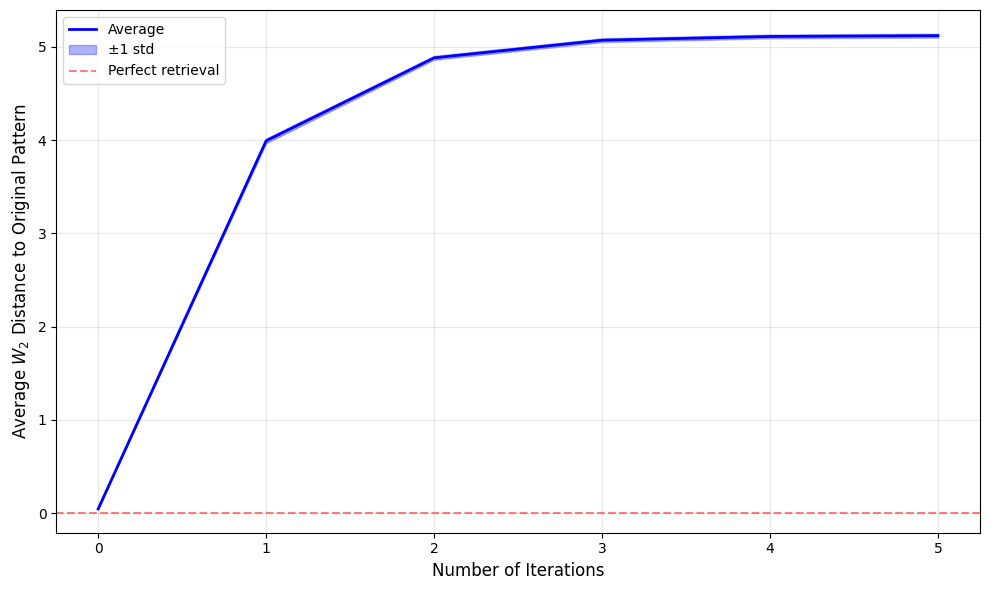

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_gaussians_on_wasserstein_sphere(N, d, lambda_min, lambda_max, seed=42):
    """
    Returns
    -------
    Sample N Gaussian distributions on a Wasserstein sphere using modified Algorithm 1 and return
    means : N x d array of mean vectors
    eigenvalues : N x d array of eigenvalue vectors
    """
    np.random.seed(seed)

    # Compute sphere radius and target sum
    R_squared = d * (lambda_max + lambda_min)
    R = np.sqrt(R_squared)
    target_sum = R_squared / 2

    # Storage for patterns
    means = np.zeros((N, d))
    eigenvalues = np.zeros((N, d))

    print(f"Sampling {N} Gaussians on Wasserstein sphere")
    print(f"  Sphere radius R = {R:.4f}")
    print(f"  Mean vectors sampled at radius R/√2 = {R/np.sqrt(2):.4f}")
    print(f"  Target eigenvalue sum S = {target_sum:.4f}")
    print(f"  Eigenvalue bounds: [{lambda_min}, {lambda_max}]")

    rejection_count = 0

    for i in range(N):
        # Rejection sampling for eigenvalues
        eigenvalues_found = False

        while not eigenvalues_found:
            # Sample first d-1 eigenvalues uniformly from [lambda_min, lambda_max]
            lambda_partial = np.random.uniform(lambda_min, lambda_max, d-1)

            # Compute the d-th eigenvalue to satisfy sum constraint
            lambda_d = target_sum - np.sum(lambda_partial)

            # Check if lambda_d is in valid range
            if lambda_min <= lambda_d <= lambda_max:
                # Combine all eigenvalues
                lambda_i = np.append(lambda_partial, lambda_d)

                # Randomly permute to avoid positional bias
                np.random.shuffle(lambda_i)

                eigenvalues[i] = lambda_i
                eigenvalues_found = True
            else:
                rejection_count += 1

        # Sample mean vector uniformly on sphere of radius R/\sqrt{2}
        mean_radius = R / np.sqrt(2)

        # Sample from standard normal and normalize
        mu_i = np.random.randn(d)
        mu_i = mu_i / np.linalg.norm(mu_i) * mean_radius
        means[i] = mu_i

        if (i + 1) % 1000 == 0:
            print(f"  Sampled {i+1}/{N} patterns (rejections so far: {rejection_count})")

    # Verify patterns are on the sphere
    print("\nVerifying first 5 patterns are on the Wasserstein sphere:")
    for i in range(min(5, N)):
        dist_from_origin = np.sqrt(np.linalg.norm(means[i])**2 + np.sum(eigenvalues[i]))
        mean_norm = np.linalg.norm(means[i])
        print(f"  Pattern {i}: W_2 dist from origin = {dist_from_origin:.6f}, mean norm = {mean_norm:.6f}")

    return means, eigenvalues

def compute_wasserstein_distance(mu1, lambda1, mu2, lambda2):
    """
    Returns:
    --------
    W_2^2 distance between two Gaussians with diagonal covariances.
    """
    mean_term = np.linalg.norm(mu1 - mu2) ** 2
    cov_term = np.sum((np.sqrt(lambda1) - np.sqrt(lambda2)) ** 2)
    return mean_term + cov_term

def perturb_gaussian_wasserstein(d, mu, sigma, r):
    """
    Returns:
    --------
    mu_prime : Mean vector of perturbed Gaussian
    sigma_prime : Eigenvalues of perturbed Gaussian's covariance matrix
    """
    # Ensure inputs are numpy arrays
    mu = np.asarray(mu)
    sigma = np.asarray(sigma)

    # Compute the Wasserstein radius R of the original Gaussian
    # W_2^2(delta_0, X) = ||mu||^2 + tr(Sigma) = R^2
    R_squared = np.linalg.norm(mu)**2 + np.sum(sigma)
    R = np.sqrt(R_squared)

    # Compute the scaling factor
    scaling_factor = 1 + r/R

    # Apply radial perturbation to mean
    mu_prime = scaling_factor * mu

    # Apply uniform scaling to eigenvalues
    sigma_prime = scaling_factor**2 * sigma

    return mu_prime, sigma_prime

def phi_operator(current_mean, current_eigenvalues, stored_means, stored_eigenvalues,
                 beta, epsilon=1e-10):
    """
    Returns:
    --------
    updated_mean : Mean vector of updated state
    updated_eigenvalues : Eigenvalues of updated state's covariance
    """
    N, d = stored_means.shape

    # Step 1: Compute Wasserstein distances to all stored patterns
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = compute_wasserstein_distance(
            stored_means[i], stored_eigenvalues[i],
            current_mean, current_eigenvalues
        )

    # Step 2: Compute softmax weights
    exp_values = np.exp(-beta * distances)
    weights = exp_values / np.sum(exp_values)

    # Step 3: Compute transport map coefficients (simplified for diagonal case)
    # A_i = diag(sqrt(sigma_i / omega)) where sigma_i are stored eigenvalues, omega are current
    A_coefficients = np.zeros((N, d))
    for i in range(N):
        # Add epsilon for numerical stability
        A_coefficients[i] = np.sqrt(stored_eigenvalues[i] / (current_eigenvalues + epsilon))

    # Step 4: Update means and covariances
    # Update mean
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)

    # Compute weighted average of A coefficients
    A_tilde = np.sum(weights[:, np.newaxis] * A_coefficients, axis=0)

    # Update eigenvalues: Omega' = A_tilde * Omega * A_tilde (diagonal case)
    updated_eigenvalues = A_tilde**2 * current_eigenvalues

    return updated_mean, updated_eigenvalues

def run_retrieval_dynamics(stored_means, stored_eigenvalues,
                          perturbation_radius, beta, max_iterations,
                          convergence_threshold, fraction_to_test):
    """
    Run retrieval dynamics on multiple perturbed patterns using the phi operator.
    """
    N, d = stored_means.shape

    # Step 1: Randomly sample fraction_to_test * N patterns
    num_test_patterns = int(fraction_to_test * N)
    test_indices = np.random.choice(N, size=num_test_patterns, replace=False)

    print(f"\nRetrieval Dynamics Experiment")
    print(f"=" * 50)
    print(f"Testing {num_test_patterns} patterns out of {N} total patterns")
    print(f"Perturbation radius: {perturbation_radius:.6f}")

    # Storage for all trajectories
    all_distances = []  # Will be num_test_patterns x (max_iterations+1)
    converged_count = 0

    # Step 2: Run retrieval dynamics for each selected pattern
    for i, pattern_idx in enumerate(test_indices):
        original_mean = stored_means[pattern_idx].copy()
        original_eigenvalues = stored_eigenvalues[pattern_idx].copy()

        # Perturb the pattern
        current_mean, current_eigenvalues = perturb_gaussian_wasserstein(
            d, original_mean, original_eigenvalues, perturbation_radius
        )

        # Compute initial distance
        initial_distance = np.sqrt(compute_wasserstein_distance(
            original_mean, original_eigenvalues,
            current_mean, current_eigenvalues
        ))

        # Print first 5 patterns
        if i < 5:
            print(f"\n--- Pattern {i+1} (Index {pattern_idx}) ---")
            print(f"Original mean (first 5 dims): {original_mean[:5]}")
            print(f"Perturbed mean (first 5 dims): {current_mean[:5]}")
            print(f"Mean difference norm: {np.linalg.norm(current_mean - original_mean):.6f}")
            print(f"Original eigenvalues (first 5): {original_eigenvalues[:5]}")
            print(f"Perturbed eigenvalues (first 5): {current_eigenvalues[:5]}")
            print(f"Eigenvalue difference norm: {np.linalg.norm(current_eigenvalues - original_eigenvalues):.6f}")
            print(f"W_2 distance (original to perturbed): {initial_distance:.6f}")

        # Track distances for this pattern
        pattern_distances = [initial_distance]

        # Run dynamics
        converged = False
        for iteration in range(max_iterations):
            # Apply phi operator
            new_mean, new_eigenvalues = phi_operator(
                current_mean, current_eigenvalues,
                stored_means, stored_eigenvalues, beta
            )

            # Compute distance to original pattern
            distance_to_original = np.sqrt(compute_wasserstein_distance(
                original_mean, original_eigenvalues,
                new_mean, new_eigenvalues
            ))
            pattern_distances.append(distance_to_original)

            # Compute change in state
            state_change = np.sqrt(compute_wasserstein_distance(
                current_mean, current_eigenvalues,
                new_mean, new_eigenvalues
            ))

            # Update current state
            current_mean = new_mean
            current_eigenvalues = new_eigenvalues

            # Check convergence
            if state_change < convergence_threshold:
                converged = True
                converged_count += 1
                # Pad with final value if converged early
                while len(pattern_distances) < max_iterations + 1:
                    pattern_distances.append(distance_to_original)
                break

        all_distances.append(pattern_distances)

        # Progress update
        if (i + 1) % 100 == 0 or i == 0:
            print(f"  Processed {i + 1}/{num_test_patterns} patterns")

    # Convert to numpy array for easier manipulation
    all_distances = np.array(all_distances)  # Shape: (num_test_patterns, max_iterations+1)

    # Compute average distances
    average_distances = np.mean(all_distances, axis=0)
    std_distances = np.std(all_distances, axis=0)

    print(f"\nResults:")
    print(f"  Converged: {converged_count}/{num_test_patterns} patterns")
    print(f"  Initial average W_2 distance: {average_distances[0]:.6f}")
    print(f"  Final average W_2 distance: {average_distances[-1]:.6f}")

    # Step 3: Plot the average results
    plt.figure(figsize=(10, 6))
    iterations = range(len(average_distances))

    # Plot mean with error bars
    plt.plot(iterations, average_distances, 'b-', linewidth=2, label='Average')
    plt.fill_between(iterations,
                 np.maximum(0, average_distances - std_distances),
                 average_distances + std_distances,
                 alpha=0.3, color='blue', label='±1 std')

    plt.xlabel('Number of Iterations', fontsize=12)
    plt.ylabel('Average $W_2$ Distance to Original Pattern', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Perfect retrieval')
    plt.legend()
    plt.tight_layout()
    plt.savefig('retrieval_dynamics.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'test_indices': test_indices,
        'average_distances': average_distances,
        'std_distances': std_distances,
        'all_distances': all_distances,
        'converged_count': converged_count,
        'num_test_patterns': num_test_patterns,
        'final_avg_distance': average_distances[-1],
        'initial_avg_distance': average_distances[0]
    }


def main():
    """
    Main function to run the Wasserstein sphere sampling and retrieval dynamics experiment.
    """
    # Define all parameters
    N = 5000
    d = 25
    lambda_min = 1
    lambda_max = 1.1
    seed = 42
    beta = 0.1

    # Retrieval dynamics parameters
    perturbation_radius = 1 / np.sqrt(beta * N)
    max_iterations = 5
    convergence_threshold = 1e-6
    fraction_to_test = 0.75

    print("=" * 60)
    print("WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT")
    print("=" * 60)

    # Step 1: Sample Gaussian patterns on Wasserstein sphere
    means, eigenvalues = sample_gaussians_on_wasserstein_sphere(
        N, d, lambda_min, lambda_max, seed
    )

    # Step 2: Run retrieval dynamics experiment
    results = run_retrieval_dynamics(
        means, eigenvalues,
        perturbation_radius, beta, max_iterations, convergence_threshold, fraction_to_test
    )

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import files
files.download('retrieval_dynamics.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Consider a larger basin of attraction than the theoretical one in our paper. The radius of basin of attraction in our paper is $1 / \sqrt{\beta N}$. Here I am considering the radius of basin of attraction $100 / \sqrt{\beta N}$.

WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT
Sampling 5000 Gaussians on Wasserstein sphere
  Sphere radius R = 7.2457
  Mean vectors sampled at radius R/√2 = 5.1235
  Target eigenvalue sum S = 26.2500
  Eigenvalue bounds: [1, 1.1]
  Sampled 1000/5000 patterns (rejections so far: 2566)
  Sampled 2000/5000 patterns (rejections so far: 5164)
  Sampled 3000/5000 patterns (rejections so far: 7790)
  Sampled 4000/5000 patterns (rejections so far: 10384)
  Sampled 5000/5000 patterns (rejections so far: 12946)

Verifying first 5 patterns are on the Wasserstein sphere:
  Pattern 0: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 1: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 2: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 3: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 4: W_2 dist from origin = 7.245688, mean norm = 5.123475

Retrieval Dynamics Experiment
Testing 3750 patterns out of 5000 total patterns
Perturbation radius: 4.4

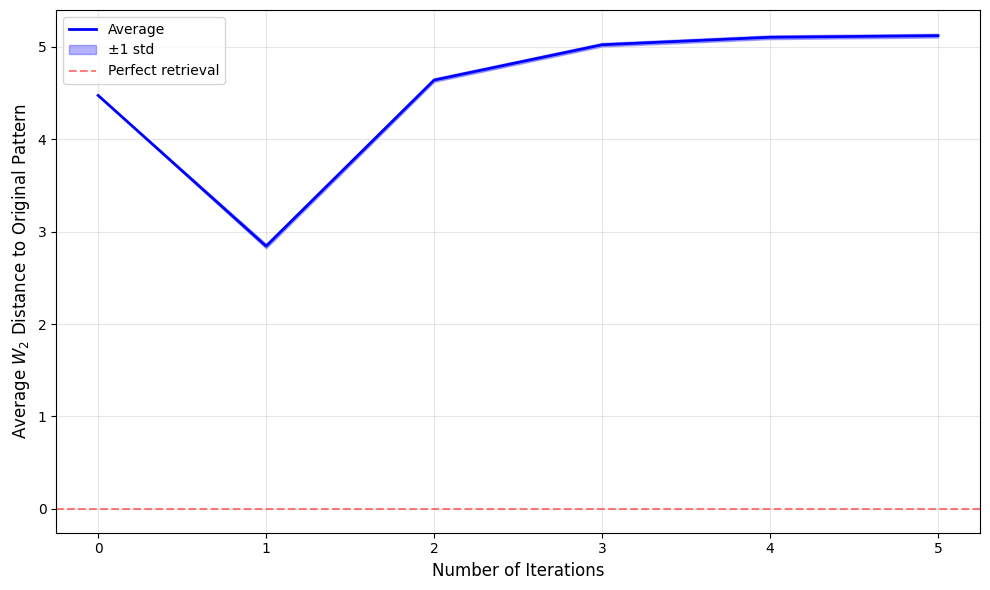

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_gaussians_on_wasserstein_sphere(N, d, lambda_min, lambda_max, seed=42):
    """
    Returns
    -------
    Sample N Gaussian distributions on a Wasserstein sphere using modified Algorithm 1 and return
    means : N x d array of mean vectors
    eigenvalues : N x d array of eigenvalue vectors
    """
    np.random.seed(seed)

    # Compute sphere radius and target sum
    R_squared = d * (lambda_max + lambda_min)
    R = np.sqrt(R_squared)
    target_sum = R_squared / 2

    # Storage for patterns
    means = np.zeros((N, d))
    eigenvalues = np.zeros((N, d))

    print(f"Sampling {N} Gaussians on Wasserstein sphere")
    print(f"  Sphere radius R = {R:.4f}")
    print(f"  Mean vectors sampled at radius R/√2 = {R/np.sqrt(2):.4f}")
    print(f"  Target eigenvalue sum S = {target_sum:.4f}")
    print(f"  Eigenvalue bounds: [{lambda_min}, {lambda_max}]")

    rejection_count = 0

    for i in range(N):
        # Rejection sampling for eigenvalues
        eigenvalues_found = False

        while not eigenvalues_found:
            # Sample first d-1 eigenvalues uniformly from [lambda_min, lambda_max]
            lambda_partial = np.random.uniform(lambda_min, lambda_max, d-1)

            # Compute the d-th eigenvalue to satisfy sum constraint
            lambda_d = target_sum - np.sum(lambda_partial)

            # Check if lambda_d is in valid range
            if lambda_min <= lambda_d <= lambda_max:
                # Combine all eigenvalues
                lambda_i = np.append(lambda_partial, lambda_d)

                # Randomly permute to avoid positional bias
                np.random.shuffle(lambda_i)

                eigenvalues[i] = lambda_i
                eigenvalues_found = True
            else:
                rejection_count += 1

        # Sample mean vector uniformly on sphere of radius R/\sqrt{2}
        mean_radius = R / np.sqrt(2)

        # Sample from standard normal and normalize
        mu_i = np.random.randn(d)
        mu_i = mu_i / np.linalg.norm(mu_i) * mean_radius
        means[i] = mu_i

        if (i + 1) % 1000 == 0:
            print(f"  Sampled {i+1}/{N} patterns (rejections so far: {rejection_count})")

    # Verify patterns are on the sphere
    print("\nVerifying first 5 patterns are on the Wasserstein sphere:")
    for i in range(min(5, N)):
        dist_from_origin = np.sqrt(np.linalg.norm(means[i])**2 + np.sum(eigenvalues[i]))
        mean_norm = np.linalg.norm(means[i])
        print(f"  Pattern {i}: W_2 dist from origin = {dist_from_origin:.6f}, mean norm = {mean_norm:.6f}")

    return means, eigenvalues

def compute_wasserstein_distance(mu1, lambda1, mu2, lambda2):
    """
    Returns:
    --------
    W_2^2 distance between two Gaussians with diagonal covariances.
    """
    mean_term = np.linalg.norm(mu1 - mu2) ** 2
    cov_term = np.sum((np.sqrt(lambda1) - np.sqrt(lambda2)) ** 2)
    return mean_term + cov_term

def perturb_gaussian_wasserstein(d, mu, sigma, r):
    """
    Returns:
    --------
    mu_prime : Mean vector of perturbed Gaussian
    sigma_prime : Eigenvalues of perturbed Gaussian's covariance matrix
    """
    # Ensure inputs are numpy arrays
    mu = np.asarray(mu)
    sigma = np.asarray(sigma)

    # Compute the Wasserstein radius R of the original Gaussian
    # W_2^2(delta_0, X) = ||mu||^2 + tr(Sigma) = R^2
    R_squared = np.linalg.norm(mu)**2 + np.sum(sigma)
    R = np.sqrt(R_squared)

    # Compute the scaling factor
    scaling_factor = 1 + r/R

    # Apply radial perturbation to mean
    mu_prime = scaling_factor * mu

    # Apply uniform scaling to eigenvalues
    sigma_prime = scaling_factor**2 * sigma

    return mu_prime, sigma_prime

def phi_operator(current_mean, current_eigenvalues, stored_means, stored_eigenvalues,
                 beta, epsilon=1e-10):
    """
    Returns:
    --------
    updated_mean : Mean vector of updated state
    updated_eigenvalues : Eigenvalues of updated state's covariance
    """
    N, d = stored_means.shape

    # Step 1: Compute Wasserstein distances to all stored patterns
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = compute_wasserstein_distance(
            stored_means[i], stored_eigenvalues[i],
            current_mean, current_eigenvalues
        )

    # Step 2: Compute softmax weights
    exp_values = np.exp(-beta * distances)
    weights = exp_values / np.sum(exp_values)

    # Step 3: Compute transport map coefficients (simplified for diagonal case)
    # A_i = diag(sqrt(sigma_i / omega)) where sigma_i are stored eigenvalues, omega are current
    A_coefficients = np.zeros((N, d))
    for i in range(N):
        # Add epsilon for numerical stability
        A_coefficients[i] = np.sqrt(stored_eigenvalues[i] / (current_eigenvalues + epsilon))

    # Step 4: Update means and covariances
    # Update mean
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)

    # Compute weighted average of A coefficients
    A_tilde = np.sum(weights[:, np.newaxis] * A_coefficients, axis=0)

    # Update eigenvalues: Omega' = A_tilde * Omega * A_tilde (diagonal case)
    updated_eigenvalues = A_tilde**2 * current_eigenvalues

    return updated_mean, updated_eigenvalues

def run_retrieval_dynamics(stored_means, stored_eigenvalues,
                          perturbation_radius, beta, max_iterations,
                          convergence_threshold, fraction_to_test):
    """
    Run retrieval dynamics on multiple perturbed patterns using the phi operator.
    """
    N, d = stored_means.shape

    # Step 1: Randomly sample fraction_to_test * N patterns
    num_test_patterns = int(fraction_to_test * N)
    test_indices = np.random.choice(N, size=num_test_patterns, replace=False)

    print(f"\nRetrieval Dynamics Experiment")
    print(f"=" * 50)
    print(f"Testing {num_test_patterns} patterns out of {N} total patterns")
    print(f"Perturbation radius: {perturbation_radius:.6f}")

    # Storage for all trajectories
    all_distances = []  # Will be num_test_patterns x (max_iterations+1)
    converged_count = 0

    # Step 2: Run retrieval dynamics for each selected pattern
    for i, pattern_idx in enumerate(test_indices):
        original_mean = stored_means[pattern_idx].copy()
        original_eigenvalues = stored_eigenvalues[pattern_idx].copy()

        # Perturb the pattern
        current_mean, current_eigenvalues = perturb_gaussian_wasserstein(
            d, original_mean, original_eigenvalues, perturbation_radius
        )

        # Compute initial distance
        initial_distance = np.sqrt(compute_wasserstein_distance(
            original_mean, original_eigenvalues,
            current_mean, current_eigenvalues
        ))

        # Print first 5 patterns
        if i < 5:
            print(f"\n--- Pattern {i+1} (Index {pattern_idx}) ---")
            print(f"Original mean (first 5 dims): {original_mean[:5]}")
            print(f"Perturbed mean (first 5 dims): {current_mean[:5]}")
            print(f"Mean difference norm: {np.linalg.norm(current_mean - original_mean):.6f}")
            print(f"Original eigenvalues (first 5): {original_eigenvalues[:5]}")
            print(f"Perturbed eigenvalues (first 5): {current_eigenvalues[:5]}")
            print(f"Eigenvalue difference norm: {np.linalg.norm(current_eigenvalues - original_eigenvalues):.6f}")
            print(f"W_2 distance (original to perturbed): {initial_distance:.6f}")

        # Track distances for this pattern
        pattern_distances = [initial_distance]

        # Run dynamics
        converged = False
        for iteration in range(max_iterations):
            # Apply phi operator
            new_mean, new_eigenvalues = phi_operator(
                current_mean, current_eigenvalues,
                stored_means, stored_eigenvalues, beta
            )

            # Compute distance to original pattern
            distance_to_original = np.sqrt(compute_wasserstein_distance(
                original_mean, original_eigenvalues,
                new_mean, new_eigenvalues
            ))
            pattern_distances.append(distance_to_original)

            # Compute change in state
            state_change = np.sqrt(compute_wasserstein_distance(
                current_mean, current_eigenvalues,
                new_mean, new_eigenvalues
            ))

            # Update current state
            current_mean = new_mean
            current_eigenvalues = new_eigenvalues

            # Check convergence
            if state_change < convergence_threshold:
                converged = True
                converged_count += 1
                # Pad with final value if converged early
                while len(pattern_distances) < max_iterations + 1:
                    pattern_distances.append(distance_to_original)
                break

        all_distances.append(pattern_distances)

        # Progress update
        if (i + 1) % 100 == 0 or i == 0:
            print(f"  Processed {i + 1}/{num_test_patterns} patterns")

    # Convert to numpy array for easier manipulation
    all_distances = np.array(all_distances)  # Shape: (num_test_patterns, max_iterations+1)

    # Compute average distances
    average_distances = np.mean(all_distances, axis=0)
    std_distances = np.std(all_distances, axis=0)

    print(f"\nResults:")
    print(f"  Converged: {converged_count}/{num_test_patterns} patterns")
    print(f"  Initial average W_2 distance: {average_distances[0]:.6f}")
    print(f"  Final average W_2 distance: {average_distances[-1]:.6f}")

    # Step 3: Plot the average results
    plt.figure(figsize=(10, 6))
    iterations = range(len(average_distances))

    # Plot mean with error bars
    plt.plot(iterations, average_distances, 'b-', linewidth=2, label='Average')
    plt.fill_between(iterations,
                     average_distances - std_distances,
                     average_distances + std_distances,
                     alpha=0.3, color='blue', label='±1 std')

    plt.xlabel('Number of Iterations', fontsize=12)
    plt.ylabel('Average $W_2$ Distance to Original Pattern', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Perfect retrieval')
    plt.legend()
    plt.tight_layout()
    plt.savefig('retrieval_dynamics.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'test_indices': test_indices,
        'average_distances': average_distances,
        'std_distances': std_distances,
        'all_distances': all_distances,
        'converged_count': converged_count,
        'num_test_patterns': num_test_patterns,
        'final_avg_distance': average_distances[-1],
        'initial_avg_distance': average_distances[0]
    }


def main():
    """
    Main function to run the Wasserstein sphere sampling and retrieval dynamics experiment.
    """
    # Define all parameters
    N = 5000
    d = 25
    lambda_min = 1
    lambda_max = 1.1
    seed = 42
    beta = 0.1

    # Retrieval dynamics parameters
    perturbation_radius = 100 / np.sqrt(beta * N)
    max_iterations = 5
    convergence_threshold = 1e-6
    fraction_to_test = 0.75

    print("=" * 60)
    print("WASSERSTEIN GAUSSIAN MEMORY EXPERIMENT")
    print("=" * 60)

    # Step 1: Sample Gaussian patterns on Wasserstein sphere
    means, eigenvalues = sample_gaussians_on_wasserstein_sphere(
        N, d, lambda_min, lambda_max, seed
    )

    # Step 2: Run retrieval dynamics experiment
    results = run_retrieval_dynamics(
        means, eigenvalues,
        perturbation_radius, beta, max_iterations, convergence_threshold, fraction_to_test
    )

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import files
files.download('retrieval_dynamics.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Contour plot:**

WASSERSTEIN GAUSSIAN MEMORY - SINGLE PATTERN RETRIEVAL
Sampling 5000 Gaussians on Wasserstein sphere
  Sphere radius R = 7.2457
  Mean vectors sampled at radius R/√2 = 5.1235
  Target eigenvalue sum S = 26.2500
  Eigenvalue bounds: [1, 1.1]
  Sampled 1000/5000 patterns (rejections so far: 2566)
  Sampled 2000/5000 patterns (rejections so far: 5164)
  Sampled 3000/5000 patterns (rejections so far: 7790)
  Sampled 4000/5000 patterns (rejections so far: 10384)
  Sampled 5000/5000 patterns (rejections so far: 12946)

Verifying first 5 patterns are on the Wasserstein sphere:
  Pattern 0: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 1: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 2: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 3: W_2 dist from origin = 7.245688, mean norm = 5.123475
  Pattern 4: W_2 dist from origin = 7.245688, mean norm = 5.123475

Single Pattern Retrieval Dynamics
Selected pattern index: 3456
Perturbation radius: 4.4

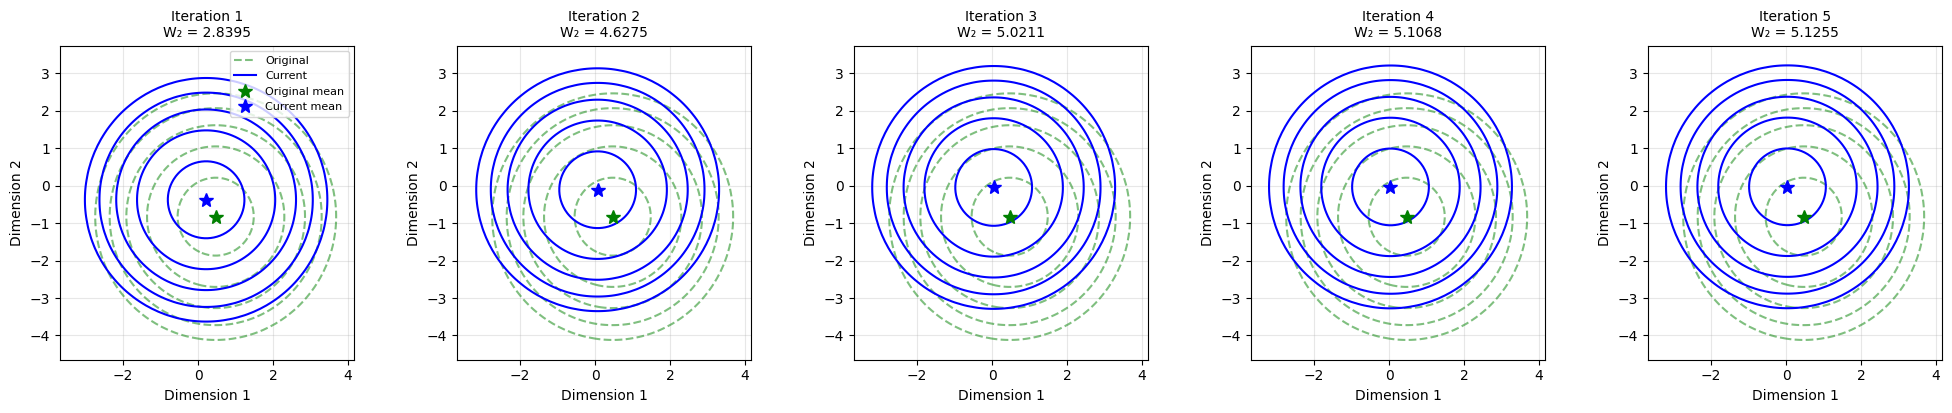

In [ ]:
def plot_gaussian_contours(ax, mean, eigenvalues, dims=[0, 1], n_contours=5, alpha=1.0,
                          colors='blue', linestyles='solid', label=None, levels=None):
    """
    Plot 2D contours of a Gaussian distribution (projecting to specified dimensions)

    Parameters:
    -----------
    ax : matplotlib axis object
    mean : d-dimensional mean vector
    eigenvalues : d-dimensional eigenvalue vector (diagonal covariance)
    dims : which two dimensions to plot (default [0, 1])
    n_contours : number of contour levels
    alpha : transparency
    colors : color for contours
    linestyles : style of contour lines
    label : label for legend
    levels : specific contour levels to use (if None, will be computed)
    """
    from scipy.stats import multivariate_normal
    import numpy as np

    # Extract 2D mean and covariance for selected dimensions
    mean_2d = mean[dims]
    cov_2d = np.diag(eigenvalues[dims])

    # Create grid for plotting
    x_range = 4 * np.sqrt(eigenvalues[dims[0]])
    y_range = 4 * np.sqrt(eigenvalues[dims[1]])

    x = np.linspace(mean_2d[0] - x_range, mean_2d[0] + x_range, 100)
    y = np.linspace(mean_2d[1] - y_range, mean_2d[1] + y_range, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Compute probability density
    rv = multivariate_normal(mean_2d, cov_2d)
    Z = rv.pdf(pos)

    # Plot contours with specified levels or auto-computed levels
    if levels is not None:
        contour = ax.contour(X, Y, Z, levels=levels, colors=colors,
                            linestyles=linestyles, alpha=alpha)
    else:
        contour = ax.contour(X, Y, Z, levels=n_contours, colors=colors,
                            linestyles=linestyles, alpha=alpha)

    # Add label to one of the contours if provided
    if label:
        # Create a dummy line for legend
        ax.plot([], [], color=colors, linestyle=linestyles, label=label, alpha=alpha)

    return contour

def run_single_retrieval_dynamics(stored_means, stored_eigenvalues,
                                 perturbation_radius, beta, max_iterations,
                                 convergence_threshold):
    """
    Run retrieval dynamics on a single randomly selected pattern and visualize evolution.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import multivariate_normal

    N, d = stored_means.shape

    # Randomly select one pattern
    pattern_idx = np.random.choice(N)

    print(f"\nSingle Pattern Retrieval Dynamics")
    print(f"=" * 50)
    print(f"Selected pattern index: {pattern_idx}")
    print(f"Perturbation radius: {perturbation_radius:.6f}")
    print(f"Beta: {beta}")
    print(f"Max iterations: {max_iterations}")

    # Get original pattern
    original_mean = stored_means[pattern_idx].copy()
    original_eigenvalues = stored_eigenvalues[pattern_idx].copy()

    # Perturb the pattern
    perturbed_mean, perturbed_eigenvalues = perturb_gaussian_wasserstein(
        d, original_mean, original_eigenvalues, perturbation_radius
    )

    # Store evolution of the Gaussian (will store states AFTER phi operator is applied)
    evolution_means = []
    evolution_eigenvalues = []
    distances_to_original = []

    # Initial distance before any iterations
    initial_distance = np.sqrt(compute_wasserstein_distance(
        original_mean, original_eigenvalues,
        perturbed_mean, perturbed_eigenvalues
    ))

    print(f"\nInitial W_2 distance to original: {initial_distance:.6f}")
    print(f"Original mean norm: {np.linalg.norm(original_mean):.6f}")
    print(f"Perturbed mean norm: {np.linalg.norm(perturbed_mean):.6f}")

    # Run dynamics
    current_mean = perturbed_mean.copy()
    current_eigenvalues = perturbed_eigenvalues.copy()

    for iteration in range(max_iterations):
        # Apply phi operator
        new_mean, new_eigenvalues = phi_operator(
            current_mean, current_eigenvalues,
            stored_means, stored_eigenvalues, beta
        )

        # Store the state AFTER phi operator
        evolution_means.append(new_mean.copy())
        evolution_eigenvalues.append(new_eigenvalues.copy())

        # Compute distance to original
        distance_to_original = np.sqrt(compute_wasserstein_distance(
            original_mean, original_eigenvalues,
            new_mean, new_eigenvalues
        ))
        distances_to_original.append(distance_to_original)

        # Compute change in state
        state_change = np.sqrt(compute_wasserstein_distance(
            current_mean, current_eigenvalues,
            new_mean, new_eigenvalues
        ))

        print(f"Iteration {iteration + 1}: W_2 distance to original = {distance_to_original:.6f}, state change = {state_change:.8f}")

        # Update current state
        current_mean = new_mean
        current_eigenvalues = new_eigenvalues

        # Check convergence
        if state_change < convergence_threshold:
            print(f"Converged after {iteration + 1} iterations")
            break

    # Create visualization (now showing only the 5 iterations, not the initial perturbed state)
    n_plots = len(evolution_means)  # Should be 5 for 5 iterations

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 4))

    # Determine global plot limits based on all states
    all_means = evolution_means + [original_mean]
    all_eigenvalues = evolution_eigenvalues + [original_eigenvalues]

    x_min, x_max = float('inf'), float('-inf')
    y_min, y_max = float('inf'), float('-inf')

    for mean, eig in zip(all_means, all_eigenvalues):
        x_range = 3 * np.sqrt(eig[0])
        y_range = 3 * np.sqrt(eig[1])
        x_min = min(x_min, mean[0] - x_range)
        x_max = max(x_max, mean[0] + x_range)
        y_min = min(y_min, mean[1] - y_range)
        y_max = max(y_max, mean[1] + y_range)

    # Add some padding
    x_padding = 0.1 * (x_max - x_min)
    y_padding = 0.1 * (y_max - y_min)

    # First compute consistent contour levels for the original Gaussian
    # This ensures the green contours look the same in all panels
    mean_2d = original_mean[[0, 1]]
    cov_2d = np.diag(original_eigenvalues[[0, 1]])
    rv_original = multivariate_normal(mean_2d, cov_2d)

    # Sample the PDF at the mean to get a reference level
    max_density = rv_original.pdf(mean_2d)
    # Create exponentially spaced levels for nice-looking contours
    # Sort to ensure they're in increasing order (required by matplotlib)
    original_levels = np.sort(max_density * np.exp(-np.linspace(0.5, 5, 5)))

    # Plot evolution (only iterations 1-5, not the initial perturbed state)
    for i in range(n_plots):
        ax = plt.subplot(1, n_plots, i + 1)

        # Plot original pattern (target) in green with consistent levels
        plot_gaussian_contours(ax, original_mean, original_eigenvalues,
                              dims=[0, 1], n_contours=5, alpha=0.5,
                              colors='green', linestyles='dashed', label='Original',
                              levels=original_levels)

        # Plot current state (after iteration i+1)
        title = f"Iteration {i+1}\nW₂ = {distances_to_original[i]:.4f}"
        color = 'blue'

        # For current state, compute its own levels for better visualization
        mean_2d_current = evolution_means[i][[0, 1]]
        cov_2d_current = np.diag(evolution_eigenvalues[i][[0, 1]])
        rv_current = multivariate_normal(mean_2d_current, cov_2d_current)
        max_density_current = rv_current.pdf(mean_2d_current)
        # Sort to ensure levels are in increasing order
        current_levels = np.sort(max_density_current * np.exp(-np.linspace(0.5, 5, 5)))

        plot_gaussian_contours(ax, evolution_means[i], evolution_eigenvalues[i],
                              dims=[0, 1], n_contours=5, alpha=1.0,
                              colors=color, linestyles='solid', label='Current',
                              levels=current_levels)

        # Mark the means
        ax.plot(original_mean[0], original_mean[1], 'g*', markersize=10, label='Original mean')
        ax.plot(evolution_means[i][0], evolution_means[i][1], 'b*',
                markersize=10, label='Current mean')

        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        ax.set_xlabel('Dimension 1', fontsize=10)
        ax.set_ylabel('Dimension 2', fontsize=10)
        ax.set_title(title, fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')

        if i == 0:
            ax.legend(fontsize=8, loc='upper right')
    plt.tight_layout()
    plt.savefig('gaussian_evolution_contours.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'pattern_idx': pattern_idx,
        'original_mean': original_mean,
        'original_eigenvalues': original_eigenvalues,
        'evolution_means': evolution_means,
        'evolution_eigenvalues': evolution_eigenvalues,
        'distances_to_original': distances_to_original,
        'final_distance': distances_to_original[-1] if distances_to_original else None,
        'initial_distance': initial_distance
    }

def main():
    """
    Main function to run single pattern retrieval dynamics with contour visualization.
    """
    # Define all parameters
    N = 5000
    d = 25
    lambda_min = 1
    lambda_max = 1.1
    seed = 42
    beta = 0.1

    # Retrieval dynamics parameters
    perturbation_radius = 100 / np.sqrt(beta * N)
    max_iterations = 5
    convergence_threshold = 1e-6

    print("=" * 60)
    print("WASSERSTEIN GAUSSIAN MEMORY - SINGLE PATTERN RETRIEVAL")
    print("=" * 60)

    # Step 1: Sample Gaussian patterns on Wasserstein sphere
    means, eigenvalues = sample_gaussians_on_wasserstein_sphere(
        N, d, lambda_min, lambda_max, seed
    )

    # Step 2: Run retrieval dynamics on single pattern
    results = run_single_retrieval_dynamics(
        means, eigenvalues,
        perturbation_radius, beta, max_iterations, convergence_threshold
    )

if __name__ == "__main__":
    main()

**Download plot**

In [ ]:
from google.colab import files
files.download('gaussian_evolution_contours.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualization of $\Phi$ operator and the weights

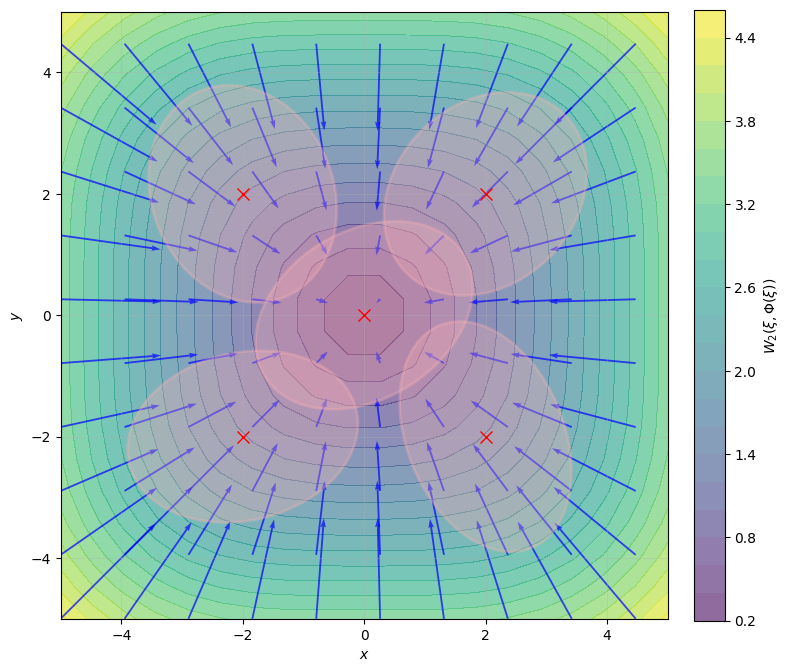

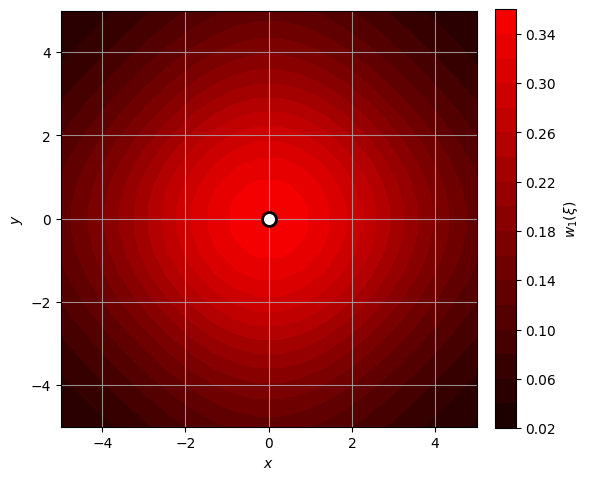

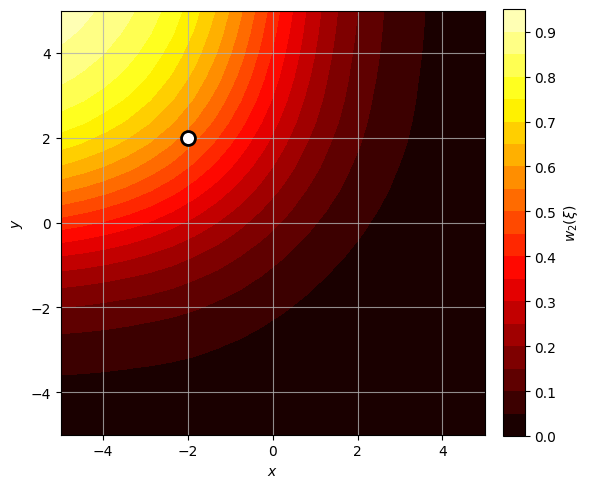

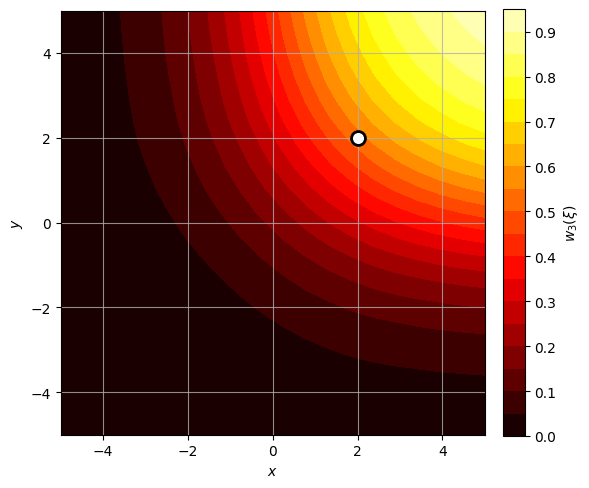

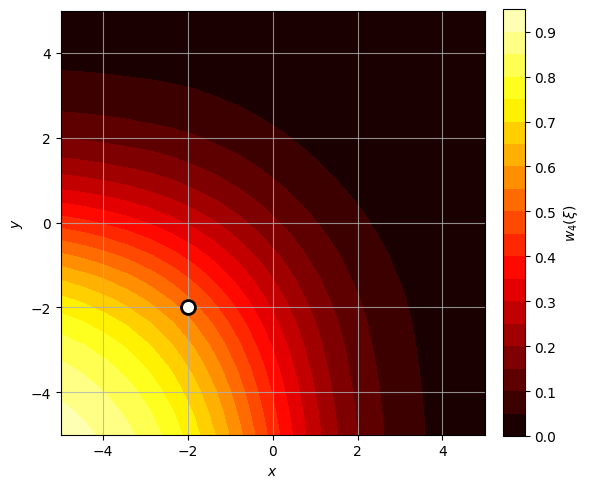

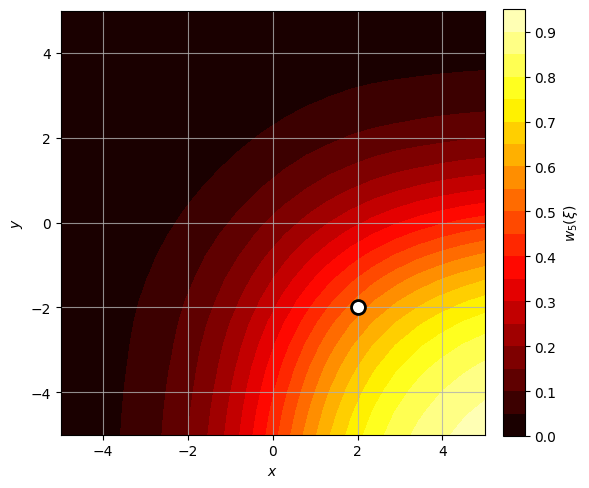

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap

def wasserstein_distance_gaussian(mu1, Sigma1, mu2, Sigma2):
    """
    Returns: 2-Wasserstein distance between two Gaussians
    W2^2 = ||mu1 - mu2||^2 + Tr(Sigma1 + Sigma2 - 2(Sigma1^{1/2} Sigma2 Sigma1^{1/2})^{1/2})
    """
    mean_diff = np.linalg.norm(mu1 - mu2)**2

    # Compute the covariance term
    Sigma1_sqrt = sqrtm(Sigma1).real
    temp = Sigma1_sqrt @ Sigma2 @ Sigma1_sqrt
    temp_sqrt = sqrtm(temp).real

    cov_term = np.trace(Sigma1 + Sigma2 - 2*temp_sqrt)

    return np.sqrt(mean_diff + cov_term)

def compute_optimal_transport_map(Sigma_source, Sigma_target):
    """
    Returns: The linear part of the optimal transport map from source to target Gaussian
    A = Sigma_target^{1/2} (Sigma_target^{1/2} Sigma_source Sigma_target^{1/2})^{-1/2} Sigma_target^{1/2}
    """
    Sigma_target_sqrt = sqrtm(Sigma_target).real
    temp = Sigma_target_sqrt @ Sigma_source @ Sigma_target_sqrt
    temp_inv_sqrt = np.linalg.inv(sqrtm(temp).real)

    A = Sigma_target_sqrt @ temp_inv_sqrt @ Sigma_target_sqrt
    return A

def phi_operator(query_mean, query_cov, stored_patterns, beta):
    """
    Returns: Phi operator applied to a query Gaussian
    """
    N = len(stored_patterns)

    # Compute Wasserstein distances and weights
    distances_squared = []
    for pattern in stored_patterns:
        dist = wasserstein_distance_gaussian(query_mean, query_cov,
                                            pattern['mean'], pattern['cov'])
        distances_squared.append(dist**2)

    # Compute softmax weights
    weights = np.exp(-beta * np.array(distances_squared))
    weights = weights / weights.sum()

    # Compute weighted mean
    new_mean = np.zeros(2)
    for i, pattern in enumerate(stored_patterns):
        new_mean += weights[i] * pattern['mean']

    # Compute transport maps and weighted covariance
    # For simplicity, using weighted average of transported covariances
    new_cov = np.zeros((2, 2))
    for i, pattern in enumerate(stored_patterns):
        try:
            A_i = compute_optimal_transport_map(query_cov, pattern['cov'])
            transported_cov = A_i @ query_cov @ A_i.T
            new_cov += weights[i] * transported_cov
        except:
            # Fallback to simple weighted average if transport fails
            new_cov += weights[i] * pattern['cov']

    return new_mean, new_cov, weights

def plot_ellipse(ax, mean, cov, color='#FFB3B3', alpha=0.3, label=None):
    """
    Returns: 2-sigma ellipse for a Gaussian distribution
    """
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    eigenvalues = np.maximum(eigenvalues, 1e-6)  # Ensure positive

    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * 2 * np.sqrt(eigenvalues)  # 2-sigma ellipse

    ellipse = Ellipse(mean, width, height, angle=angle,
                      facecolor=color, alpha=alpha, edgecolor=color,
                      linewidth=2, fill=True, label=label)
    ax.add_patch(ellipse)

    # Mark center
    ax.plot(mean[0], mean[1], 'x', color='red', markersize=8)

def visualize_phi_operator(beta, query_scale=0.5, resolution=20):
    """
    Returns: Visualization of the Phi operator
    """
    stored_patterns = [
        {'mean': np.array([0, 0]), 'cov': np.array([[0.8, 0.2], [0.2, 0.6]])},
        {'mean': np.array([-2, 2]), 'cov': np.array([[0.6, -0.1], [-0.1, 0.8]])},
        {'mean': np.array([2, 2]), 'cov': np.array([[0.7, 0.15], [0.15, 0.7]])},
        {'mean': np.array([-2, -2]), 'cov': np.array([[0.9, 0.1], [0.1, 0.5]])},
        {'mean': np.array([2, -2]), 'cov': np.array([[0.5, -0.2], [-0.2, 0.9]])}
    ]

    # Fixed query covariance
    query_cov = np.array([[query_scale, 0], [0, query_scale]])

    # Create grid
    x = np.linspace(-5, 5, resolution)
    y = np.linspace(-5, 5, resolution)
    X, Y = np.meshgrid(x, y)

    # Compute Phi operator on grid
    W2_distances = np.zeros((resolution, resolution))
    U = np.zeros((resolution, resolution))  # x-component of vector field
    V = np.zeros((resolution, resolution))  # y-component of vector field

    for i in range(resolution):
        for j in range(resolution):
            query_mean = np.array([X[i, j], Y[i, j]])
            new_mean, new_cov, weights = phi_operator(query_mean, query_cov,
                                                      stored_patterns, beta)

            # Compute W2 distance between query and result
            W2_distances[i, j] = wasserstein_distance_gaussian(
                query_mean, query_cov, new_mean, new_cov
            )

            # Vector field
            U[i, j] = new_mean[0] - query_mean[0]
            V[i, j] = new_mean[1] - query_mean[1]

    # Also compute weights for each stored pattern
    Weights = np.zeros((resolution, resolution, len(stored_patterns)))

    for i in range(resolution):
        for j in range(resolution):
            query_mean = np.array([X[i, j], Y[i, j]])
            _, _, weights = phi_operator(query_mean, query_cov, stored_patterns, beta)
            Weights[i, j, :] = weights

    # PLOT 1: Main plot - Heatmap with vector field
    fig1 = plt.figure(figsize=(8, 8))
    ax1 = fig1.add_subplot(111)

    # Heatmap
    im = ax1.contourf(X, Y, W2_distances, levels=20, cmap='viridis', alpha=0.6)
    plt.colorbar(im, ax=ax1, label=r'$W_2(\xi, \Phi(\xi))$', fraction=0.046, pad=0.04)

    # Vector field (subsample for clarity)
    skip = max(1, resolution // 10)
    ax1.quiver(X[::skip, ::skip], Y[::skip, ::skip],
               U[::skip, ::skip], V[::skip, ::skip],
               color='blue', alpha=0.7, scale=20, width=0.003)

    # Plot stored patterns
    for idx, pattern in enumerate(stored_patterns):
        label = r'$X_%d$' % (idx+1) if idx == 0 else None
        plot_ellipse(ax1, pattern['mean'], pattern['cov'],
            color='#FFB3B3', alpha=0.3, label=label)

    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    #ax1.legend()
    plt.tight_layout()
    plt.savefig('phi_operator_main.png', dpi=150, bbox_inches='tight')
    plt.show()

    # PLOT 2-6: Individual weight heatmaps for each stored pattern
    for idx in range(5):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)

        im = ax.contourf(X, Y, Weights[:, :, idx], levels=20, cmap='hot', vmin=0, vmax=1)
        plt.colorbar(im, ax=ax, label=r'$w_%d(\xi)$' % (idx+1), fraction=0.046, pad=0.04)

        # Mark the stored pattern location
        ax.plot(stored_patterns[idx]['mean'][0], stored_patterns[idx]['mean'][1],
                'wo', markersize=10, markeredgecolor='black', markeredgewidth=2)

        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True, alpha=0.8)
        ax.set_aspect('equal')
        plt.tight_layout()
        plt.savefig(f'weight_{idx+1}.png', dpi=150, bbox_inches='tight')
        plt.show()

if __name__ == "__main__":
    visualize_phi_operator(beta=0.1, query_scale=0.5, resolution=20)

In [ ]:
from google.colab import files
files.download('phi_operator_main.png')
files.download('weight_1.png')
files.download('weight_2.png')
files.download('weight_3.png')
files.download('weight_4.png')
files.download('weight_5.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Retrieval dynamics for the non-commuting covariance matrix case**

WASSERSTEIN DAM - GENERAL COVARIANCE CASE
Sampling 1000 Gaussians on Wasserstein sphere
  Sphere radius R = 4.4721
  Mean budget: 10.0000
  Covariance trace budget: 10.0000
  Sampled 200/1000 patterns
  Sampled 400/1000 patterns
  Sampled 600/1000 patterns
  Sampled 800/1000 patterns
  Sampled 1000/1000 patterns

Verifying first 3 patterns are on the Wasserstein sphere:
  Pattern 0: W_2^2 from origin = 20.000000 (target: 20.000000)
  Pattern 1: W_2^2 from origin = 20.000000 (target: 20.000000)
  Pattern 2: W_2^2 from origin = 20.000000 (target: 20.000000)

Retrieval Dynamics Experiment (General Case)
Testing 750 patterns out of 1000 total
Perturbation radius: 3.162278
  Processed 150/750 patterns
  Processed 300/750 patterns
  Processed 450/750 patterns
  Processed 600/750 patterns
  Processed 750/750 patterns

Results:
  Converged: 521/750 patterns
  Initial average W_2 distance: 3.162278
  Final average W_2 distance: 0.157643


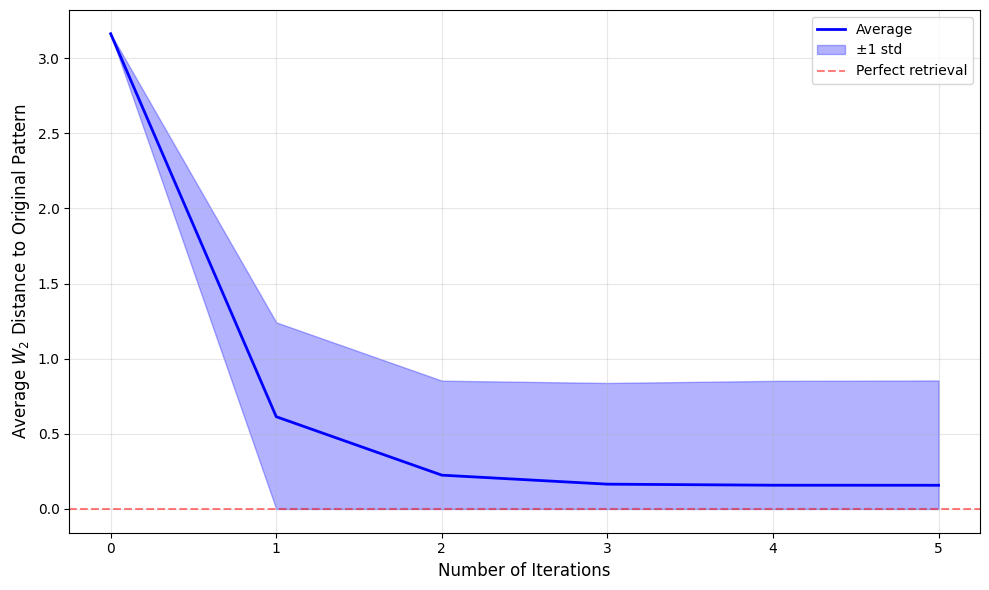

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.optimize import brentq

def safe_matrix_sqrt(M, epsilon=1e-8):
    """
    Compute matrix square root with numerical stability.
    Uses eigendecomposition and clips small eigenvalues.
    """
    # Symmetrize to handle numerical errors
    M = (M + M.T) / 2

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(M)

    # Clip negative eigenvalues
    eigvals = np.maximum(eigvals, epsilon)

    # Reconstruct square root
    sqrt_M = eigvecs @ np.diag(np.sqrt(eigvals)) @ eigvecs.T

    # Symmetrize result
    sqrt_M = (sqrt_M + sqrt_M.T) / 2

    return sqrt_M

def safe_matrix_inverse_sqrt(M, epsilon=1e-8):
    """
    Compute inverse square root of a matrix with numerical stability.
    """
    # Symmetrize
    M = (M + M.T) / 2

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(M)

    # Clip small eigenvalues and invert
    eigvals = np.maximum(eigvals, epsilon)
    inv_sqrt_eigvals = 1.0 / np.sqrt(eigvals)

    # Reconstruct inverse square root
    inv_sqrt_M = eigvecs @ np.diag(inv_sqrt_eigvals) @ eigvecs.T

    # Symmetrize result
    inv_sqrt_M = (inv_sqrt_M + inv_sqrt_M.T) / 2

    return inv_sqrt_M

def wasserstein_distance_squared(mu1, Sigma1, mu2, Sigma2, epsilon=1e-8):
    """
    Compute W_2^2 distance between two Gaussians with numerical stability.
    """
    # Mean term
    mean_term = np.linalg.norm(mu1 - mu2) ** 2

    # Compute covariance term with care
    Sigma1_sqrt = safe_matrix_sqrt(Sigma1, epsilon)

    # Compute (Sigma1^{1/2} Sigma2 Sigma1^{1/2})^{1/2}
    temp = Sigma1_sqrt @ Sigma2 @ Sigma1_sqrt
    temp = (temp + temp.T) / 2  # Symmetrize
    cross_term = safe_matrix_sqrt(temp, epsilon)

    # Compute trace term
    cov_term = np.trace(Sigma1 + Sigma2 - 2*cross_term)

    # Ensure non-negative (can be slightly negative due to numerics)
    total = mean_term + cov_term
    return max(0, total)

def sample_gaussians_on_wasserstein_sphere(N, d, R, seed=42):
    """
    Sample N Gaussian distributions on a Wasserstein sphere.
    """
    np.random.seed(seed)

    # Split R^2 equally
    mean_budget = R**2 / 2
    cov_budget = R**2 / 2

    means = np.zeros((N, d))
    covariances = np.zeros((N, d, d))

    print(f"Sampling {N} Gaussians on Wasserstein sphere")
    print(f"  Sphere radius R = {R:.4f}")
    print(f"  Mean budget: {mean_budget:.4f}")
    print(f"  Covariance trace budget: {cov_budget:.4f}")

    for i in range(N):
        # Sample mean
        mu = np.random.randn(d)
        mu = mu / np.linalg.norm(mu) * np.sqrt(mean_budget)
        means[i] = mu

        # Generate random SPD matrix with controlled condition number
        # Use fewer random directions to ensure better conditioning
        rank = d  # Full rank but with controlled spectrum
        W = np.random.randn(d, rank)
        Sigma = W @ W.T

        # Add small diagonal regularization for stability
        Sigma = Sigma + 0.01 * np.eye(d)

        # Scale to match trace budget
        current_trace = np.trace(Sigma)
        scaling = cov_budget / current_trace
        Sigma = scaling * Sigma

        covariances[i] = Sigma

        if (i + 1) % max(1, N//5) == 0:
            print(f"  Sampled {i+1}/{N} patterns")

    # Verify
    print("\nVerifying first 3 patterns are on the Wasserstein sphere:")
    for i in range(min(3, N)):
        dist_sq = np.linalg.norm(means[i])**2 + np.trace(covariances[i])
        print(f"  Pattern {i}: W_2^2 from origin = {dist_sq:.6f} (target: {R**2:.6f})")

    return means, covariances

def perturb_gaussian_split_budget(mu, Sigma, r, seed=None):
    """
    Perturb a Gaussian by W_2 distance r using split budget approach.
    """
    if seed is not None:
        np.random.seed(seed)

    d = len(mu)
    epsilon = 1e-8

    # Split budget
    mean_distance_sq = r**2 / 2
    cov_distance_sq = r**2 / 2

    # Step 1: Perturb mean (exact)
    delta_mu = np.random.randn(d)
    delta_mu = delta_mu / np.linalg.norm(delta_mu) * np.sqrt(mean_distance_sq)
    mu_perturbed = mu + delta_mu

    # Step 2: Perturb covariance
    # Generate a small random perturbation
    E = np.random.randn(d, d) * 0.1  # Smaller perturbation
    delta_Sigma = E @ E.T

    # Define distance function
    def cov_distance(t):
        if t < 0:
            return 0
        Sigma_test = Sigma + t * delta_Sigma

        # Check if positive definite
        eigvals = np.linalg.eigvalsh(Sigma_test)
        if np.min(eigvals) < epsilon:
            return np.inf

        # Compute covariance distance term
        Sigma_sqrt = safe_matrix_sqrt(Sigma, epsilon)
        temp = Sigma_sqrt @ Sigma_test @ Sigma_sqrt
        temp = (temp + temp.T) / 2
        cross_term = safe_matrix_sqrt(temp, epsilon)
        dist = np.trace(Sigma + Sigma_test - 2*cross_term)
        return max(0, dist)  # Ensure non-negative

    # Find t using binary search
    t_low = 0
    t_high = 0.1  # Start with smaller value

    # Find valid upper bound
    max_attempts = 20
    for _ in range(max_attempts):
        if cov_distance(t_high) >= cov_distance_sq:
            break
        t_high *= 2

    # Binary search with fallback
    if cov_distance(t_high) < cov_distance_sq:
        # If we can't reach the target distance, use smaller perturbation
        t_opt = t_high / 2
    else:
        try:
            # Use bounded root finding
            t_opt = brentq(lambda t: cov_distance(t) - cov_distance_sq,
                          t_low, t_high, xtol=1e-6, maxiter=50)
        except:
            # Fallback to small perturbation
            t_opt = 0.01

    Sigma_perturbed = Sigma + t_opt * delta_Sigma

    # Ensure positive definite
    eigvals, eigvecs = np.linalg.eigh(Sigma_perturbed)
    eigvals = np.maximum(eigvals, epsilon)
    Sigma_perturbed = eigvecs @ np.diag(eigvals) @ eigvecs.T

    return mu_perturbed, Sigma_perturbed

def phi_operator_general(current_mean, current_cov, stored_means, stored_covs,
                         beta, epsilon=1e-8):
    """
    Phi operator with improved numerical stability.
    """
    N, d = stored_means.shape

    # Step 1: Compute Wasserstein distances
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = wasserstein_distance_squared(
            stored_means[i], stored_covs[i],
            current_mean, current_cov, epsilon
        )

    # Step 2: Compute softmax weights with numerical stability
    # Subtract max for numerical stability
    max_val = -beta * np.min(distances)
    exp_values = np.exp(-beta * distances - max_val)
    weights = exp_values / np.sum(exp_values)

    # Step 3: Compute transport map coefficients
    A_matrices = []

    for i in range(N):
        # Compute A_i = Sigma_i^{1/2} (Sigma_i^{1/2} Omega Sigma_i^{1/2})^{-1/2} Sigma_i^{1/2}
        Sigma_i_sqrt = safe_matrix_sqrt(stored_covs[i], epsilon)

        # Compute Sigma_i^{1/2} Omega Sigma_i^{1/2}
        temp = Sigma_i_sqrt @ current_cov @ Sigma_i_sqrt
        temp = (temp + temp.T) / 2  # Symmetrize

        # Compute (Sigma_i^{1/2} Omega Sigma_i^{1/2})^{-1/2}
        temp_inv_sqrt = safe_matrix_inverse_sqrt(temp, epsilon)

        # Compute A_i
        A_i = Sigma_i_sqrt @ temp_inv_sqrt @ Sigma_i_sqrt
        A_i = (A_i + A_i.T) / 2  # Symmetrize

        A_matrices.append(A_i)

    # Step 4: Update mean
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)

    # Step 5: Update covariance
    # Compute weighted average of transport maps
    A_tilde = np.zeros((d, d))
    for i in range(N):
        A_tilde += weights[i] * A_matrices[i]

    # Ensure A_tilde is symmetric
    A_tilde = (A_tilde + A_tilde.T) / 2

    # Update covariance
    updated_cov = A_tilde @ current_cov @ A_tilde.T

    # Ensure positive definite and symmetric
    updated_cov = (updated_cov + updated_cov.T) / 2
    eigvals, eigvecs = np.linalg.eigh(updated_cov)
    eigvals = np.maximum(eigvals, epsilon)
    updated_cov = eigvecs @ np.diag(eigvals) @ eigvecs.T

    return updated_mean, updated_cov

def run_retrieval_dynamics_general(stored_means, stored_covs,
                                  perturbation_radius, beta, max_iterations,
                                  convergence_threshold, fraction_to_test):
    """
    Run retrieval dynamics for general covariance case.
    """
    N, d = stored_means.shape
    epsilon = 1e-8

    # Sample test patterns
    num_test_patterns = int(fraction_to_test * N)
    test_indices = np.random.choice(N, size=num_test_patterns, replace=False)

    print(f"\nRetrieval Dynamics Experiment (General Case)")
    print(f"=" * 50)
    print(f"Testing {num_test_patterns} patterns out of {N} total")
    print(f"Perturbation radius: {perturbation_radius:.6f}")

    all_distances = []
    converged_count = 0

    for idx, pattern_idx in enumerate(test_indices):
        original_mean = stored_means[pattern_idx].copy()
        original_cov = stored_covs[pattern_idx].copy()

        # Perturb
        current_mean, current_cov = perturb_gaussian_split_budget(
            original_mean, original_cov, perturbation_radius, seed=42+idx
        )

        # Initial distance
        initial_distance = np.sqrt(wasserstein_distance_squared(
            original_mean, original_cov,
            current_mean, current_cov, epsilon
        ))

        pattern_distances = [initial_distance]

        # Run dynamics
        for iteration in range(max_iterations):
            # Apply phi operator
            new_mean, new_cov = phi_operator_general(
                current_mean, current_cov,
                stored_means, stored_covs, beta, epsilon
            )

            # Compute distance
            dist_sq = wasserstein_distance_squared(
                original_mean, original_cov,
                new_mean, new_cov, epsilon
            )
            distance_to_original = np.sqrt(max(0, dist_sq))
            pattern_distances.append(distance_to_original)

            # Compute state change
            change_sq = wasserstein_distance_squared(
                current_mean, current_cov,
                new_mean, new_cov, epsilon
            )
            state_change = np.sqrt(max(0, change_sq))

            # Update state
            current_mean = new_mean
            current_cov = new_cov

            # Check convergence
            if state_change < convergence_threshold:
                converged_count += 1
                while len(pattern_distances) < max_iterations + 1:
                    pattern_distances.append(distance_to_original)
                break

        all_distances.append(pattern_distances)

        if (idx + 1) % max(1, num_test_patterns//5) == 0:
            print(f"  Processed {idx + 1}/{num_test_patterns} patterns")

    # Compute statistics
    all_distances = np.array(all_distances)
    average_distances = np.mean(all_distances, axis=0)
    std_distances = np.std(all_distances, axis=0)

    print(f"\nResults:")
    print(f"  Converged: {converged_count}/{num_test_patterns} patterns")
    print(f"  Initial average W_2 distance: {average_distances[0]:.6f}")
    print(f"  Final average W_2 distance: {average_distances[-1]:.6f}")

    # Plot
    plt.figure(figsize=(10, 6))
    iterations = range(len(average_distances))

    plt.plot(iterations, average_distances, 'b-', linewidth=2, label='Average')
    plt.fill_between(iterations,
                     np.maximum(0, average_distances - std_distances),
                     average_distances + std_distances,
                     alpha=0.3, color='blue', label='±1 std')

    plt.xlabel('Number of Iterations', fontsize=12)
    plt.ylabel('Average $W_2$ Distance to Original Pattern', fontsize=12)
    #plt.title('Retrieval Dynamics for General Covariance Matrices', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Perfect retrieval')
    plt.legend()
    plt.tight_layout()
    plt.savefig('retrieval_dynamics_general.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'average_distances': average_distances,
        'std_distances': std_distances,
        'converged_count': converged_count,
        'num_test_patterns': num_test_patterns
    }

def main():
    """
    Main function for general covariance case.
    """
    # Parameters
    N = 1000
    d = 10
    R = np.sqrt(d * 2)
    seed = 42
    beta = 1

    # Retrieval parameters
    perturbation_radius = 100 / np.sqrt(beta * N)
    max_iterations = 5
    convergence_threshold = 1e-6
    fraction_to_test = 0.75

    print("=" * 60)
    print("WASSERSTEIN DAM - GENERAL COVARIANCE CASE")
    print("=" * 60)

    # Sample and run
    means, covariances = sample_gaussians_on_wasserstein_sphere(N, d, R, seed)

    results = run_retrieval_dynamics_general(
        means, covariances,
        perturbation_radius, beta, max_iterations,
        convergence_threshold, fraction_to_test
    )

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import files
files.download('retrieval_dynamics_general.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Real world data**

In [ ]:
# Install word2gauss
!git clone https://github.com/seomoz/word2gauss
!cd word2gauss && pip install -r requirements.txt && pip install .

Cloning into 'word2gauss'...
remote: Enumerating objects: 630, done.
remote: Total 630 (delta 0), reused 0 (delta 0), pack-reused 630 (from 1)
Receiving objects: 100% (630/630), 112.01 KiB | 1.49 MiB/s, done.
Resolving deltas: 100% (376/376), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 12.0 MB/s eta 0:00:00
Processing /content/word2gauss
  Preparing metadata (setup.py) ... done
  Created wheel for word2gauss: filename=word2gauss-0.0.0-cp312-cp312-linux_x86_64.whl size=994632 sha256=cd020ec1ada617f9609a4e0a6259de22cd6e89b451521871de1342684d95d83e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dk5tg0pm/wheels/f1/c1/88/0951fa4f3eda9eb3e264c774c1b6a0eae29c3e5ff7579166be
Successfully built word2gauss


**Generate Gaussian distribution for words**

In [ ]:
#!/usr/bin/env python

import os
import sys
import numpy as np
import pickle
import urllib.request
import zipfile
from collections import Counter
import time

from word2gauss import GaussianEmbedding, iter_pairs

def download_text8():
    # Returns path to text8 corpus
    if not os.path.exists('text8'):
        urllib.request.urlretrieve('http://mattmahoney.net/dc/text8.zip', 'text8.zip')
        with zipfile.ZipFile('text8.zip', 'r') as zip_ref:
            zip_ref.extractall('.')
        os.remove('text8.zip')
    return 'text8'

class CustomVocabulary:
    # Returns vocabulary object with word2id, id2word mappings and required methods
    def __init__(self, corpus_path, max_vocab=5000, min_count=5):
        word_counts = Counter()
        with open(corpus_path, 'r') as f:
            for line in f:
                words = line.strip().split()
                word_counts.update(words)

        common_words = [word for word, count in word_counts.most_common(max_vocab)
                       if count >= min_count]

        self.word2id = {word: np.uint32(idx) for idx, word in enumerate(common_words)}
        self.id2word = {np.uint32(idx): word for word, idx in self.word2id.items()}

        counts = np.array([word_counts[self.id2word[np.uint32(i)]]
                          for i in range(len(self.id2word))], dtype=np.float64)
        self.sample_probs = np.power(counts, 0.75)
        self.sample_probs = self.sample_probs.astype(np.float64)
        self.sample_probs /= self.sample_probs.sum()

    def __len__(self):
        return len(self.word2id)

    def __contains__(self, word):
        return word in self.word2id

    def tokenize(self, text, remove_oov=True):
        # Returns list of tokens
        tokens = text.strip().split()
        if remove_oov:
            return [token for token in tokens if token in self.word2id]
        else:
            return tokens

    def tokenize_ids(self, text, remove_oov=True):
        # Returns uint32 array of token IDs
        tokens = text.strip().split()

        if remove_oov:
            ids = [self.word2id[token] for token in tokens if token in self.word2id]
        else:
            OOV_ID = np.iinfo(np.uint32).max
            ids = []
            for token in tokens:
                if token in self.word2id:
                    ids.append(self.word2id[token])
                else:
                    ids.append(OOV_ID)

        return np.array(ids, dtype=np.uint32) if ids else np.array([], dtype=np.uint32)

    def random_ids(self, n):
        # Returns uint32 array of n random token IDs
        n = int(n)
        ids = np.random.choice(len(self.word2id), size=n, p=self.sample_probs)
        return ids.astype(np.uint32)

def train_word2gauss(embed_dim, max_vocab, min_count, window_size,
                    num_epochs, num_workers, corpus_sample):
    # Returns trained GaussianEmbedding and vocabulary

    text8_path = download_text8()
    vocab = CustomVocabulary(text8_path, max_vocab=max_vocab, min_count=min_count)

    embed = GaussianEmbedding(
        len(vocab),
        embed_dim,
        covariance_type='spherical',
        energy_type='KL'
    )

    def corpus_iterator():
        # Returns iterator over corpus documents
        with open(text8_path, 'r') as f:
            text = f.read()
            words = text.split()[:corpus_sample] if corpus_sample else text.split()
            doc_size = 1000
            for i in range(0, len(words), doc_size):
                yield ' '.join(words[i:i+doc_size])

    for epoch in range(num_epochs):
        start_time = time.time()

        training_pairs = iter_pairs(
            corpus_iterator(),
            vocab,
            batch_size=100,
            nsamples=2,
            window=window_size
        )

        embed.train(training_pairs, n_workers=num_workers)

        elapsed = time.time() - start_time
        mean_norm = np.mean(np.linalg.norm(embed.mu, axis=1))
        mean_sigma = np.mean(embed.sigma)
        print(f"Epoch {epoch + 1}/{num_epochs}: {elapsed:.2f}s, mean_norm={mean_norm:.3f}, mean_sigma={mean_sigma:.6f}")

    return embed, vocab

def extract_gaussians(embed, vocab):
    # Returns list of Gaussian dictionaries for DAM
    gaussians = []

    for idx in range(len(vocab)):
        word = vocab.id2word[idx]
        mean = embed.mu[idx].copy()
        sigma_value = embed.sigma[idx]

        if np.isscalar(sigma_value):
            covariance = np.eye(len(mean)) * sigma_value
            variance = sigma_value
        else:
            covariance = np.diag(sigma_value)
            variance = sigma_value

        gaussians.append({
            'word': word,
            'mean': mean,
            'covariance': covariance,
            'variance': variance,
            'id': idx
        })

    with open('gaussians_for_dam.pkl', 'wb') as f:
        pickle.dump(gaussians, f)

    return gaussians

def display_first_gaussians(gaussians, n=3):
    # Returns None, prints mean vectors and variance of first n words
    for i in range(min(n, len(gaussians))):
        g = gaussians[i]
        mean = g['mean']
        print(f"\nWord: '{g['word']}'")
        print(f"Mean vector (first 10 dims): {mean[:10].round(4).tolist()}")
        print(f"Mean vector (last 10 dims): {mean[-10:].round(4).tolist()}")
        variance_val = g['variance'] if np.isscalar(g['variance']) else g['variance'].mean()
        print(f"Variance: {variance_val:.6f}")

if __name__ == "__main__":
    config = {
        'embed_dim': 50,
        'max_vocab': 10000,
        'min_count': 5,
        'window_size': 5,
        'num_epochs': 5,
        'num_workers': 4,
        'corpus_sample': 100000
    }

    embed, vocab = train_word2gauss(**config)
    gaussians = extract_gaussians(embed, vocab)
    display_first_gaussians(gaussians, n=3)

Epoch 1/5: 3.96s, mean_norm=0.726, mean_sigma=0.969853
Epoch 2/5: 4.00s, mean_norm=0.738, mean_sigma=0.976544
Epoch 3/5: 3.94s, mean_norm=0.755, mean_sigma=0.979188
Epoch 4/5: 3.93s, mean_norm=0.771, mean_sigma=0.980379
Epoch 5/5: 3.96s, mean_norm=0.786, mean_sigma=0.980788

Word: 'the'
Mean vector (first 10 dims): [-0.06430000066757202, 0.06390000134706497, 0.07259999960660934, -0.03689999878406525, -0.09440000355243683, 0.015300000086426735, -0.010300000198185444, 0.006099999882280827, 0.041999999433755875, 0.024700000882148743]
Mean vector (last 10 dims): [0.002199999988079071, 0.04859999939799309, 0.041099999099969864, 0.0502999983727932, -0.035999998450279236, -0.03700000047683716, -0.09350000321865082, -0.07500000298023224, 0.020500000566244125, -0.02199999988079071]
Variance: 0.948436

Word: 'of'
Mean vector (first 10 dims): [-0.017999999225139618, 0.06960000097751617, -0.05889999866485596, -0.05420000106096268, -0.07699999958276749, -0.026399999856948853, -0.04809999838471413, 

**Track word trajectory:**

Loading word Gaussians...
RANDOMLY SELECTED WORDS
  Position 8182: 'loans'
  Position 3651: 'approval'
  Position 8950: 'confusing'
  Position 5252: 'genius'
  Position 3142: 'grow'

RETRIEVAL DYNAMICS EXPERIMENT
Beta: 1
Perturbation radius: 0.010000
Tracking 5 words

Tracking: 'loans' (position 8182)


/tmp/ipython-input-1576015272.py:288: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  variances = np.array([float(g['variance']) if not np.isscalar(g['variance'])


Final word: 'in' - FAILED
Unique words in path: loans → to → in

Tracking: 'approval' (position 3651)
Final word: 'in' - FAILED
Unique words in path: approval → to → in

Tracking: 'confusing' (position 8950)
Final word: 'in' - FAILED
Unique words in path: confusing → in

Tracking: 'genius' (position 5252)
Final word: 'in' - FAILED
Unique words in path: genius → in

Tracking: 'grow' (position 3142)
Final word: 'in' - FAILED
Unique words in path: grow → to → in


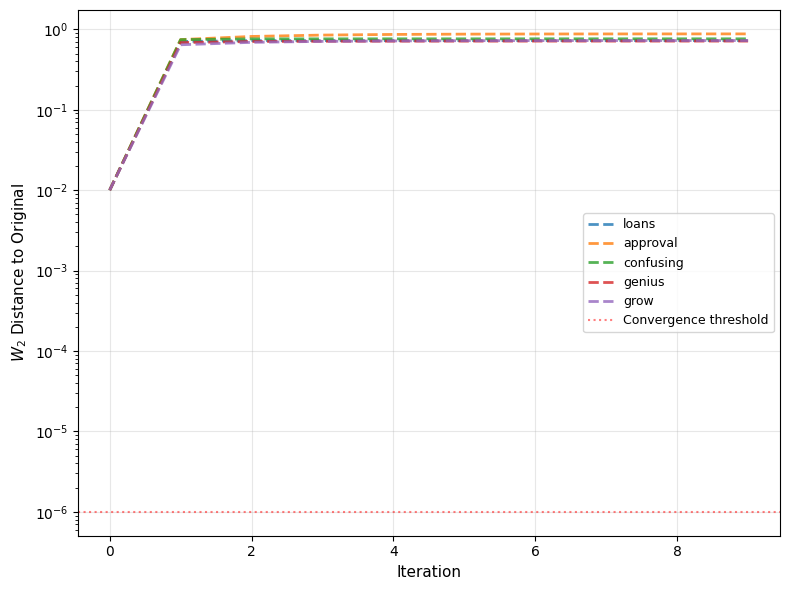

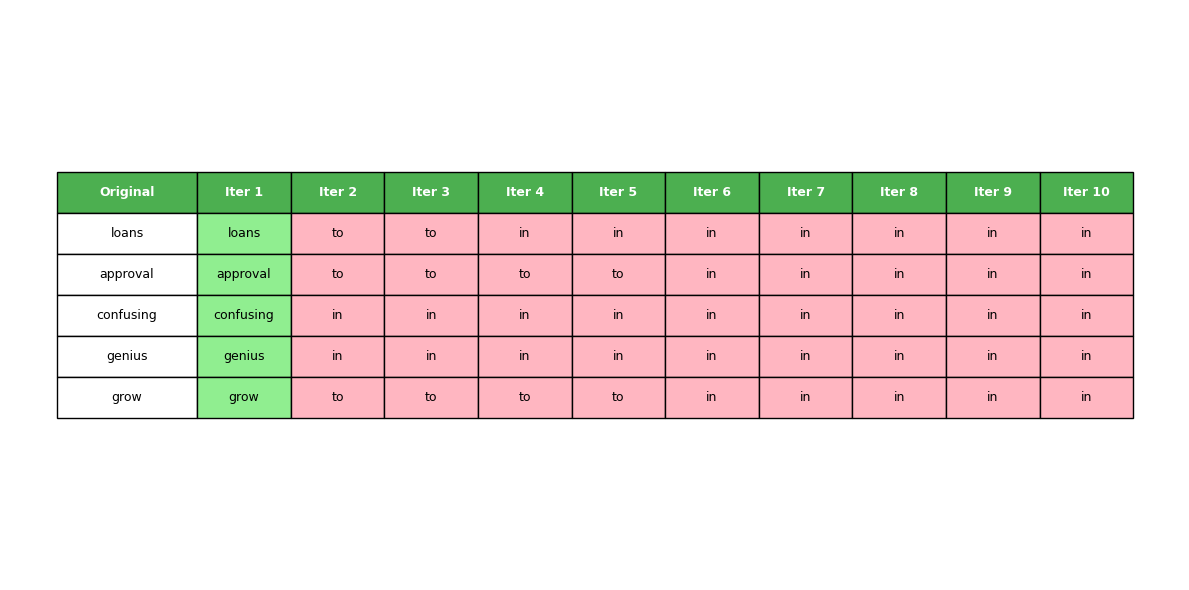


SUMMARY
Overall convergence rate: 0.0%

Words that converged:

Words that failed:
  'loans' → 'in' - distance: 7.25e-01
  'approval' → 'in' - distance: 8.78e-01
  'confusing' → 'in' - distance: 7.63e-01
  'genius' → 'in' - distance: 7.15e-01
  'grow' → 'in' - distance: 7.26e-01


In [ ]:
#!/usr/bin/env python
"""
Track retrieval dynamics for randomly selected words from Word2Gauss vocabulary
"""

import numpy as np
import matplotlib.pyplot as plt
import pickle

# ============================================================================
# Core Functions
# ============================================================================

def compute_wasserstein_distance(mean1, var1, mean2, var2):
    """Returns W_2^2 (squared 2-Wasserstein distance) between two spherical Gaussians."""
    d = len(mean1)
    if isinstance(var1, np.ndarray):
        var1 = float(var1.item()) if var1.size == 1 else float(var1)
    else:
        var1 = float(var1)
    if isinstance(var2, np.ndarray):
        var2 = float(var2.item()) if var2.size == 1 else float(var2)
    else:
        var2 = float(var2)
    var1 = max(var1, 1e-10)
    var2 = max(var2, 1e-10)
    mean_diff_sq = np.linalg.norm(mean1 - mean2) ** 2
    std1 = np.sqrt(var1)
    std2 = np.sqrt(var2)
    cov_term = d * (std1 - std2) ** 2
    return mean_diff_sq + cov_term

def perturb_gaussian_wasserstein(d, mu, sigma, r):
    """Perturbs a spherical Gaussian to Wasserstein distance r from original."""
    mu = np.asarray(mu)
    if isinstance(sigma, np.ndarray):
        sigma = float(sigma.item()) if sigma.size == 1 else float(sigma)
    else:
        sigma = float(sigma)
    R_squared = np.linalg.norm(mu)**2 + d * sigma
    R = np.sqrt(R_squared)
    scaling_factor = 1 + r/R
    mu_prime = scaling_factor * mu
    sigma_prime = scaling_factor**2 * sigma
    return mu_prime, sigma_prime

def phi_operator(current_mean, current_var, stored_means, stored_vars, beta, epsilon=1e-10):
    """Φ operator for spherical Gaussians - one step of retrieval dynamics."""
    N, d = stored_means.shape
    distances_sq = np.zeros(N)
    for i in range(N):
        distances_sq[i] = compute_wasserstein_distance(
            stored_means[i], stored_vars[i],
            current_mean, current_var
        )
    min_dist_idx = np.argmin(distances_sq)
    min_dist = distances_sq[min_dist_idx]
    if beta > 50:
        rel_distances = distances_sq - min_dist
        min_positive = np.min(rel_distances[rel_distances > 0]) if np.any(rel_distances > 0) else 1
        if beta * min_positive > 100:
            weights = np.zeros(N)
            weights[min_dist_idx] = 1.0
        else:
            exp_values = np.exp(-beta * rel_distances)
            sum_exp = np.sum(exp_values)
            if sum_exp > 0:
                weights = exp_values / sum_exp
            else:
                weights = np.zeros(N)
                weights[min_dist_idx] = 1.0
    else:
        exp_values = np.exp(-beta * (distances_sq - min_dist))
        weights = exp_values / np.sum(exp_values)
    if np.any(np.isnan(weights)) or np.sum(weights) == 0:
        weights = np.zeros(N)
        weights[min_dist_idx] = 1.0
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)
    weighted_std = np.sum(weights * np.sqrt(np.maximum(stored_vars, epsilon)))
    updated_var = weighted_std ** 2
    return updated_mean, updated_var

# ============================================================================
# Word Selection Function
# ============================================================================

def select_random_words(gaussians, n_words=5, avoid_top_n=100, seed=None):
    """
    Select random words avoiding ultra-frequent ones.

    Parameters:
    -----------
    gaussians: List of Gaussian dictionaries
    n_words: Number of words to select
    avoid_top_n: Avoid the first N words (most frequent)
    seed: Random seed for reproducibility
    """
    if seed is not None:
        np.random.seed(seed)

    N = len(gaussians)

    # Select from words after the top N most frequent
    candidate_indices = list(range(avoid_top_n, N))

    # Randomly sample n_words
    selected_indices = np.random.choice(candidate_indices, n_words, replace=False)

    # Create list of (index, word) tuples
    selected_words = [(idx, gaussians[idx]['word']) for idx in selected_indices]

    print("=" * 60)
    print("RANDOMLY SELECTED WORDS")
    print("=" * 60)
    for idx, word in selected_words:
        print(f"  Position {idx}: '{word}'")

    return selected_words

# ============================================================================
# Tracking Function
# ============================================================================

def track_multiple_words(stored_means, stored_variances, gaussians,
                         word_indices, beta, perturbation_radius,
                         max_iterations=10):
    """
    Track retrieval dynamics for multiple words and create comparison plot.
    """
    results = []

    for idx, word in word_indices:
        print(f"\n{'='*50}")
        print(f"Tracking: '{word}' (position {idx})")
        print(f"{'='*50}")

        original_mean = stored_means[idx].copy()
        original_var = float(stored_variances[idx])

        # Perturb
        current_mean, current_var = perturb_gaussian_wasserstein(
            len(original_mean), original_mean, original_var, perturbation_radius
        )

        distances = []
        closest_words = []

        for iteration in range(max_iterations):
            # Distance to original
            dist = np.sqrt(compute_wasserstein_distance(
                original_mean, original_var,
                current_mean, current_var
            ))
            distances.append(dist)

            # Find closest word
            all_dists = np.zeros(len(gaussians))
            for i in range(len(gaussians)):
                all_dists[i] = compute_wasserstein_distance(
                    stored_means[i], stored_variances[i],
                    current_mean, current_var
                )
            closest_idx = np.argmin(all_dists)
            closest_words.append(gaussians[closest_idx]['word'])

            # Apply dynamics
            current_mean, current_var = phi_operator(
                current_mean, current_var,
                stored_means, stored_variances, beta
            )

        converged = (closest_words[-1] == word)
        print(f"Final word: '{closest_words[-1]}' - {'CONVERGED' if converged else 'FAILED'}")
        print(f"Unique words in path: {' → '.join(dict.fromkeys(closest_words))}")

        results.append({
            'word': word,
            'idx': idx,
            'distances': distances,
            'closest_words': closest_words,
            'converged': converged
        })

    return results

# ============================================================================
# Plotting Function (UPDATED)
# ============================================================================

def plot_comparison(results, save_prefix='random_words_retrieval'):
    """
    Create and save two separate plots for word retrieval analysis.
    """
    # Figure 1: Distance trajectories
    fig1, ax1 = plt.subplots(figsize=(8, 6))

    for r in results:
        style = '-' if r['converged'] else '--'
        label = f"{r['word']}"
        ax1.plot(r['distances'], style, linewidth=2, label=label, alpha=0.8)

    ax1.set_xlabel('Iteration', fontsize=11)
    ax1.set_ylabel('$W_2$ Distance to Original', fontsize=11)
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=1e-6, color='r', linestyle=':', alpha=0.5,
                label='Convergence threshold')
    ax1.legend(loc='best', fontsize=9)

    plt.tight_layout()
    plt.savefig(f'{save_prefix}_trajectories.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Figure 2: Trajectory table
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    ax2.axis('tight')
    ax2.axis('off')

    # Prepare table data
    n_iterations = len(results[0]['closest_words'])
    table_data = []
    colors_data = []

    # Header row - CHANGED: Now starts from Iter 1 instead of Iter 0
    headers = ['Original'] + [f'Iter {i+1}' for i in range(n_iterations)]

    # Data rows
    for r in results:
        row = [r['word']] + r['closest_words']
        # Truncate long words for display
        row = [w[:12] if len(w) > 12 else w for w in row]
        table_data.append(row)

        # Color coding: green if matches original, red if different
        row_colors = []
        for i, word in enumerate(r['closest_words']):
            if word == r['word']:
                row_colors.append('#90EE90')  # Light green
            elif i == 0:
                row_colors.append('#FFFFE0')  # Light yellow for first iteration
            else:
                row_colors.append('#FFB6C1')  # Light red
        colors_data.append(['white'] + row_colors)  # White for original word column

    # Create table
    table = ax2.table(cellText=table_data,
                     colLabels=headers,
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.12] + [0.08]*n_iterations)

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)  # Make table taller for better visibility

    # Color cells
    for i, row_colors in enumerate(colors_data):
        for j, color in enumerate(row_colors):
            table[(i+1, j)].set_facecolor(color)

    # Style header
    for j in range(len(headers)):
        table[(0, j)].set_facecolor('#4CAF50')
        table[(0, j)].set_text_props(weight='bold', color='white')

    plt.tight_layout()
    plt.savefig(f'{save_prefix}_table.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig1, fig2

# ============================================================================
# Main Execution
# ============================================================================

def main():
    # Load the Gaussians
    print("Loading word Gaussians...")
    with open('gaussians_for_dam.pkl', 'rb') as f:
        gaussians = pickle.load(f)

    N = len(gaussians)
    d = len(gaussians[0]['mean'])

    # Extract means and variances
    means = np.array([g['mean'] for g in gaussians])
    variances = np.array([float(g['variance']) if not np.isscalar(g['variance'])
                         else g['variance'] for g in gaussians])

    # Select 5 random words avoiding the top 100 most frequent
    # Use seed=42 for reproducibility, or remove seed for truly random selection
    words_to_track = select_random_words(gaussians, n_words=5, avoid_top_n=100, seed=40)

    # Parameters
    beta = 1
    perturbation_radius = 1.0 / np.sqrt(beta * N)

    print(f"\n{'='*60}")
    print("RETRIEVAL DYNAMICS EXPERIMENT")
    print(f"{'='*60}")
    print(f"Beta: {beta}")
    print(f"Perturbation radius: {perturbation_radius:.6f}")
    print(f"Tracking {len(words_to_track)} words")

    # Track retrieval for selected words
    results = track_multiple_words(
        means, variances, gaussians,
        words_to_track, beta, perturbation_radius,
        max_iterations=10
    )

    # Create comparison plot
    plot_comparison(results, save_prefix='random_words_retrieval_beta10')

    # Summary statistics
    print(f"\n{'='*60}")
    print("SUMMARY")
    print(f"{'='*60}")
    convergence_rate = sum(r['converged'] for r in results) / len(results)
    print(f"Overall convergence rate: {convergence_rate:.1%}")

    print("\nWords that converged:")
    for r in results:
        if r['converged']:
            print(f"  '{r['word']}' - final distance: {r['distances'][-1]:.2e}")

    print("\nWords that failed:")
    for r in results:
        if not r['converged']:
            print(f"  '{r['word']}' → '{r['closest_words'][-1]}' - distance: {r['distances'][-1]:.2e}")

if __name__ == "__main__":
    main()

**Retrieval fraction vs beta**

/tmp/ipython-input-2965680378.py:162: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  variances = np.array([float(g['variance']) if not np.isscalar(g['variance'])


RETRIEVAL FRACTION VS BETA EXPERIMENT
Loading word Gaussians...
Testing 100 words across different beta values

Computing retrieval fractions...


Beta values:   5%|▌         | 1/20 [00:48<15:28, 48.87s/it]

  Beta = 0.10: 0.00% retrieval rate


Beta values:  10%|█         | 2/20 [01:41<15:19, 51.10s/it]

  Beta = 0.14: 0.00% retrieval rate


Beta values:  15%|█▌        | 3/20 [02:39<15:23, 54.30s/it]

  Beta = 0.21: 0.00% retrieval rate


Beta values:  20%|██        | 4/20 [03:44<15:35, 58.48s/it]

  Beta = 0.30: 0.00% retrieval rate


Beta values:  25%|██▌       | 5/20 [04:57<15:57, 63.83s/it]

  Beta = 0.43: 0.00% retrieval rate


Beta values:  30%|███       | 6/20 [06:19<16:16, 69.74s/it]

  Beta = 0.62: 0.00% retrieval rate


Beta values:  35%|███▌      | 7/20 [07:43<16:09, 74.55s/it]

  Beta = 0.89: 0.00% retrieval rate


Beta values:  40%|████      | 8/20 [09:09<15:40, 78.35s/it]

  Beta = 1.27: 0.00% retrieval rate


Beta values:  45%|████▌     | 9/20 [10:36<14:49, 80.87s/it]

  Beta = 1.83: 0.00% retrieval rate


Beta values:  50%|█████     | 10/20 [12:03<13:48, 82.81s/it]

  Beta = 2.64: 0.00% retrieval rate


Beta values:  55%|█████▌    | 11/20 [13:30<12:35, 83.96s/it]

  Beta = 3.79: 0.00% retrieval rate


Beta values:  60%|██████    | 12/20 [14:57<11:20, 85.03s/it]

  Beta = 5.46: 0.00% retrieval rate


Beta values:  65%|██████▌   | 13/20 [16:24<09:58, 85.49s/it]

  Beta = 7.85: 0.00% retrieval rate


Beta values:  70%|███████   | 14/20 [17:46<08:26, 84.49s/it]

  Beta = 11.29: 31.00% retrieval rate


Beta values:  75%|███████▌  | 15/20 [18:28<05:58, 71.79s/it]

  Beta = 16.24: 98.00% retrieval rate


Beta values:  80%|████████  | 16/20 [18:53<03:50, 57.63s/it]

  Beta = 23.36: 100.00% retrieval rate


Beta values:  85%|████████▌ | 17/20 [19:17<02:22, 47.40s/it]

  Beta = 33.60: 100.00% retrieval rate


Beta values:  90%|█████████ | 18/20 [19:40<01:20, 40.28s/it]

  Beta = 48.33: 100.00% retrieval rate


Beta values:  95%|█████████▌| 19/20 [20:04<00:35, 35.28s/it]

  Beta = 69.52: 100.00% retrieval rate


Beta values: 100%|██████████| 20/20 [20:28<00:00, 61.40s/it]

  Beta = 100.00: 100.00% retrieval rate


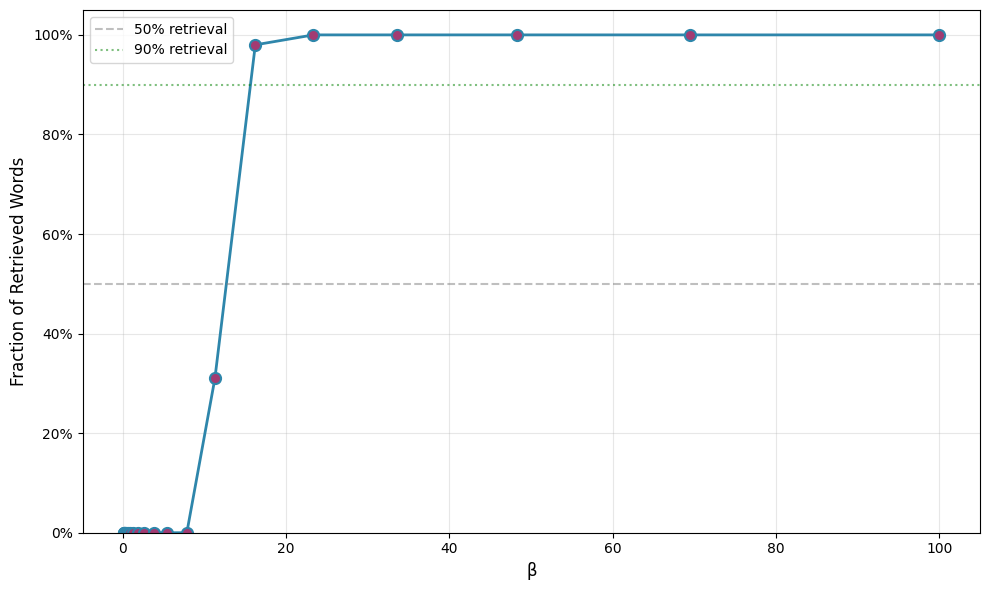


SUMMARY STATISTICS
Beta range tested: 0.10 to 100.00
Best retrieval rate: 100.00% at β = 23.36
Worst retrieval rate: 0.00% at β = 0.10
Transition to >50% retrieval around β ≈ 11.29

Plot saved as 'retrieval_vs_beta.png'


In [ ]:
#!/usr/bin/env python
"""
Generate plot of retrieval fraction vs beta for Word2Gauss embeddings
"""

import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

# ============================================================================
# Core Functions (same as before, included for standalone execution)
# ============================================================================

def compute_wasserstein_distance(mean1, var1, mean2, var2):
    """Returns W_2^2 (squared 2-Wasserstein distance) between two spherical Gaussians."""
    d = len(mean1)
    if isinstance(var1, np.ndarray):
        var1 = float(var1.item()) if var1.size == 1 else float(var1)
    else:
        var1 = float(var1)
    if isinstance(var2, np.ndarray):
        var2 = float(var2.item()) if var2.size == 1 else float(var2)
    else:
        var2 = float(var2)
    var1 = max(var1, 1e-10)
    var2 = max(var2, 1e-10)
    mean_diff_sq = np.linalg.norm(mean1 - mean2) ** 2
    std1 = np.sqrt(var1)
    std2 = np.sqrt(var2)
    cov_term = d * (std1 - std2) ** 2
    return mean_diff_sq + cov_term

def perturb_gaussian_wasserstein(d, mu, sigma, r):
    """Perturbs a spherical Gaussian to Wasserstein distance r from original."""
    mu = np.asarray(mu)
    if isinstance(sigma, np.ndarray):
        sigma = float(sigma.item()) if sigma.size == 1 else float(sigma)
    else:
        sigma = float(sigma)
    R_squared = np.linalg.norm(mu)**2 + d * sigma
    R = np.sqrt(R_squared)
    scaling_factor = 1 + r/R
    mu_prime = scaling_factor * mu
    sigma_prime = scaling_factor**2 * sigma
    return mu_prime, sigma_prime

def phi_operator(current_mean, current_var, stored_means, stored_vars, beta, epsilon=1e-10):
    """Φ operator for spherical Gaussians - one step of retrieval dynamics."""
    N, d = stored_means.shape
    distances_sq = np.zeros(N)
    for i in range(N):
        distances_sq[i] = compute_wasserstein_distance(
            stored_means[i], stored_vars[i],
            current_mean, current_var
        )
    min_dist_idx = np.argmin(distances_sq)
    min_dist = distances_sq[min_dist_idx]
    if beta > 50:
        rel_distances = distances_sq - min_dist
        min_positive = np.min(rel_distances[rel_distances > 0]) if np.any(rel_distances > 0) else 1
        if beta * min_positive > 100:
            weights = np.zeros(N)
            weights[min_dist_idx] = 1.0
        else:
            exp_values = np.exp(-beta * rel_distances)
            sum_exp = np.sum(exp_values)
            if sum_exp > 0:
                weights = exp_values / sum_exp
            else:
                weights = np.zeros(N)
                weights[min_dist_idx] = 1.0
    else:
        exp_values = np.exp(-beta * (distances_sq - min_dist))
        weights = exp_values / np.sum(exp_values)
    if np.any(np.isnan(weights)) or np.sum(weights) == 0:
        weights = np.zeros(N)
        weights[min_dist_idx] = 1.0
    updated_mean = np.sum(weights[:, np.newaxis] * stored_means, axis=0)
    weighted_std = np.sum(weights * np.sqrt(np.maximum(stored_vars, epsilon)))
    updated_var = weighted_std ** 2
    return updated_mean, updated_var

def test_retrieval(word_idx, stored_means, stored_vars, beta, perturbation_radius,
                  max_iterations=10, convergence_threshold=1e-6):
    """
    Test if a single word can be retrieved after perturbation.

    Returns:
        bool: True if converged back to original word
    """
    original_mean = stored_means[word_idx].copy()
    original_var = float(stored_vars[word_idx])

    # Perturb
    current_mean, current_var = perturb_gaussian_wasserstein(
        len(original_mean), original_mean, original_var, perturbation_radius
    )

    # Run dynamics for full iterations
    prev_mean = None
    prev_var = None

    for iteration in range(max_iterations):
        # Check if dynamics have converged (state not changing)
        if prev_mean is not None:
            state_change = np.linalg.norm(current_mean - prev_mean)
            if state_change < convergence_threshold:
                break  # Dynamics converged, check what we converged to

        # Store previous state
        prev_mean = current_mean.copy()
        prev_var = current_var

        # Apply dynamics
        current_mean, current_var = phi_operator(
            current_mean, current_var,
            stored_means, stored_vars, beta
        )

    # After dynamics have run, check what word we're closest to
    all_dists = np.zeros(len(stored_means))
    for i in range(len(stored_means)):
        all_dists[i] = compute_wasserstein_distance(
            stored_means[i], stored_vars[i],
            current_mean, current_var
        )
    closest_idx = np.argmin(all_dists)

    # Return True only if we ended up at the original word
    return closest_idx == word_idx

# ============================================================================
# Main Experiment Function
# ============================================================================

def compute_retrieval_fraction_vs_beta(sample_size=100, seed=42):
    """
    Compute retrieval fraction for different beta values.

    Parameters:
    -----------
    sample_size: Number of words to test per beta value
    seed: Random seed for reproducibility

    Returns:
    --------
    beta_values: Array of beta values tested
    retrieval_fractions: Array of corresponding retrieval fractions
    actual_sample_size: Actual number of words tested (may be less than requested)
    """
    # Load the Gaussians
    print("Loading word Gaussians...")
    with open('gaussians_for_dam.pkl', 'rb') as f:
        gaussians = pickle.load(f)

    N = len(gaussians)
    d = len(gaussians[0]['mean'])

    # Extract means and variances
    means = np.array([g['mean'] for g in gaussians])
    variances = np.array([float(g['variance']) if not np.isscalar(g['variance'])
                         else g['variance'] for g in gaussians])

    # Set random seed
    np.random.seed(seed)

    # Select sample of word indices to test
    # Avoid the most frequent words (top 100)
    candidate_indices = list(range(100, N))
    test_indices = np.random.choice(candidate_indices,
                                   min(sample_size, len(candidate_indices)),
                                   replace=False)

    print(f"Testing {len(test_indices)} words across different beta values")

    # Beta values to test (evenly spaced)
    beta_values = np.logspace(-1, 2, 20)  # From 0.1 to 100
    retrieval_fractions = []

    print("\nComputing retrieval fractions...")
    for beta in tqdm(beta_values, desc="Beta values"):
        # Perturbation radius scales with beta
        perturbation_radius = 1.0 / np.sqrt(beta * N)

        # Test retrieval for each word in sample
        successful_retrievals = 0
        for word_idx in test_indices:
            if test_retrieval(word_idx, means, variances, beta, perturbation_radius):
                successful_retrievals += 1

        fraction = successful_retrievals / len(test_indices)
        retrieval_fractions.append(fraction)

        print(f"  Beta = {beta:.2f}: {fraction:.2%} retrieval rate")

    return np.array(beta_values), np.array(retrieval_fractions), len(test_indices)

def plot_retrieval_vs_beta(beta_values, retrieval_fractions, sample_size, save_path='retrieval_vs_beta.png'):
    """
    Create and save the retrieval fraction vs beta plot.

    Parameters:
    -----------
    beta_values: Array of beta values
    retrieval_fractions: Array of retrieval fractions
    sample_size: Number of words tested
    save_path: Path to save the plot
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot (regular plot, not semilogx since we're using evenly spaced values)
    ax.plot(beta_values, retrieval_fractions, 'o-', linewidth=2, markersize=8,
            color='#2E86AB', markerfacecolor='#A23B72', markeredgewidth=1.5,
            markeredgecolor='#2E86AB')

    # Styling
    ax.set_xlabel('β', fontsize=12)
    ax.set_ylabel('Fraction of Retrieved Words', fontsize=12)

    # Grid
    ax.grid(True, alpha=0.3)

    # Y-axis formatting
    ax.set_ylim([0, 1.05])
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    # Add reference lines
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='50% retrieval')
    ax.axhline(y=0.9, color='green', linestyle=':', alpha=0.5, label='90% retrieval')

    # Add annotations for key regions
    if len(beta_values) > 0:
        # Find beta where retrieval fraction is closest to 0.5
        idx_50 = np.argmin(np.abs(retrieval_fractions - 0.5))
        if 0.4 <= retrieval_fractions[idx_50] <= 0.6:
            ax.annotate(f'β ≈ {beta_values[idx_50]:.1f}',
                       xy=(beta_values[idx_50], retrieval_fractions[idx_50]),
                       xytext=(beta_values[idx_50]*2, retrieval_fractions[idx_50]-0.1),
                       arrowprops=dict(arrowstyle='->', color='black', alpha=0.5),
                       fontsize=10)

    # Legend
    ax.legend(loc='best', fontsize=10)

    # Statistics box
    #textstr = f'Sample size: {sample_size} words\n'
    #textstr += f'Max retrieval: {retrieval_fractions.max():.1%}\n'
    #textstr += f'Min retrieval: {retrieval_fractions.min():.1%}'
    #props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    #ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
    #        verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

    return fig

# ============================================================================
# Main Execution
# ============================================================================

if __name__ == "__main__":
    print("=" * 60)
    print("RETRIEVAL FRACTION VS BETA EXPERIMENT")
    print("=" * 60)

    # Run experiment
    # Use sample_size=100 for faster execution, or increase for more accuracy
    beta_values, retrieval_fractions, actual_sample_size = compute_retrieval_fraction_vs_beta(
        sample_size=100,  # Number of words to test
        seed=42          # For reproducibility
    )

    # Create plot
    fig = plot_retrieval_vs_beta(beta_values, retrieval_fractions, actual_sample_size)

    # Print summary statistics
    print("\n" + "=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    print(f"Beta range tested: {beta_values.min():.2f} to {beta_values.max():.2f}")
    print(f"Best retrieval rate: {retrieval_fractions.max():.2%} at β = {beta_values[np.argmax(retrieval_fractions)]:.2f}")
    print(f"Worst retrieval rate: {retrieval_fractions.min():.2%} at β = {beta_values[np.argmin(retrieval_fractions)]:.2f}")

    # Find transition region (where retrieval crosses 50%)
    above_50 = retrieval_fractions > 0.5
    if np.any(above_50) and np.any(~above_50):
        transition_idx = np.where(np.diff(above_50.astype(int)))[0]
        if len(transition_idx) > 0:
            transition_beta = beta_values[transition_idx[0]]
            print(f"Transition to >50% retrieval around β ≈ {transition_beta:.2f}")

    print("\nPlot saved as 'retrieval_vs_beta.png'")